In [2]:
import os
import glob

import yaml
import rasterio
import numpy as np
import pandas as pd
import geopandas as gpd
import rasterio
from rasterio.plot import show

## File Paths

In [33]:
# set year of analysis
year = 2050

# data dir
data_dir = os.path.join(os.path.dirname(os.getcwd()), 'data', 'input_data')

# output data dir
output_dir = os.path.join(os.path.dirname(os.getcwd()), 'data', 'output_data')

# gcam generation by technology file
gcam_gen_path = os.path.join(data_dir,  'processed_generation_data', f'gcam_generation_state_tech_{year}.csv')

# raster dir
raster_dir = os.path.join(data_dir, 'raster_data')

# state raster path
state_raster_path = os.path.join(raster_dir, 'state_raster', 'state_raster_land.tif')


# west raster data dir
west_raster_dir = os.path.join(data_dir, 'west_raster_data')

# rasters with land area extent
land_area_raster_dir = os.path.join(west_raster_dir, 'land_area')

# dac exclusion raster path
dac_raster_path = os.path.join(land_area_raster_dir, 'gridcerf_usceq_cejst_exclude_all_dacs.tif')

# farmland exclusion raster path
farm_raster_path = os.path.join(land_area_raster_dir, 'gridcerf_usda_combined_important_farmland.tif')

env_1_path = os.path.join(land_area_raster_dir, 'gridcerf_combined_environment_level_1.tif')
env_1_1km_path = os.path.join(land_area_raster_dir, 'gridcerf_combined_environment_level_1_1buff.tif')
env_1_5km_path = os.path.join(land_area_raster_dir, 'gridcerf_combined_environment_level_1_5buff.tif')
env_1_10km_path = os.path.join(land_area_raster_dir, 'gridcerf_combined_environment_level_1_10buff.tif')
 
env_2_path = os.path.join(land_area_raster_dir, 'gridcerf_combined_environment_level_2.tif')
env_2_1km_path = os.path.join(land_area_raster_dir, 'gridcerf_combined_environment_level_2_1buff.tif')
env_2_5km_path = os.path.join(land_area_raster_dir, 'gridcerf_combined_environment_level_2_5buff.tif')
env_2_10km_path = os.path.join(land_area_raster_dir, 'gridcerf_combined_environment_level_2_10buff.tif')
                          
env_3_path = os.path.join(land_area_raster_dir, 'gridcerf_combined_environment_level_3.tif')
env_3_1km_path = os.path.join(land_area_raster_dir, 'gridcerf_combined_environment_level_3_1buff.tif')
env_3_5km_path = os.path.join(land_area_raster_dir, 'gridcerf_combined_environment_level_3_5buff.tif')
env_3_10km_path = os.path.join(land_area_raster_dir, 'gridcerf_combined_environment_level_3_10buff.tif')
                          

# wind potential layer
wind_100m_potential_path = os.path.join(land_area_raster_dir,'wind_100m_hubheight_2050_rcp85_potential_base_exclusions.tif')
wind_120m_potential_path = os.path.join(land_area_raster_dir,'wind_120m_hubheight_2050_rcp85_potential_base_exclusions.tif')

# wind potential layer
solar_potential_path = os.path.join(land_area_raster_dir,'gridcerf_solar_pv_resource_potential.tif')

# env raster path
env_1km_raster_path = os.path.join(raster_dir, 'environmental', 'all_areas', 'west_analysis_combined_environment_1buff.tif')
env_5km_raster_path = os.path.join(raster_dir, 'environmental',  'all_areas','west_analysis_combined_environment_5buff.tif')
env_10km_raster_path = os.path.join(raster_dir, 'environmental',  'all_areas', 'west_analysis_combined_environment_10buff.tif')


## Collect Net Zero GCAM-USA Wind and Solar Generation in 2050

#### Create dictionary of wind generation goals under net zero

In [45]:
gcam_df = pd.read_csv(gcam_gen_path)
gcam_df_wind = gcam_df[gcam_df['tech_type'] == 'Wind'].copy()
gcam_df_wind = gcam_df_wind[gcam_df_wind['scenario'] == 'net_zero_ira_ccs_climate']
gcam_df_wind = gcam_df_wind[['region_name', 'scenario','2050_KWh']]
gcam_wind_dict = gcam_df_wind.set_index('region_name').to_dict('index')
gcam_wind_dict

{'arizona': {'scenario': 'net_zero_ira_ccs_climate',
  '2050_KWh': 27293103611.0},
 'california': {'scenario': 'net_zero_ira_ccs_climate',
  '2050_KWh': 120102545278.0},
 'colorado': {'scenario': 'net_zero_ira_ccs_climate',
  '2050_KWh': 69555893333.0},
 'idaho': {'scenario': 'net_zero_ira_ccs_climate', '2050_KWh': 12397083528.0},
 'montana': {'scenario': 'net_zero_ira_ccs_climate',
  '2050_KWh': 128392581667.0},
 'new_mexico': {'scenario': 'net_zero_ira_ccs_climate',
  '2050_KWh': 46859963611.0},
 'nevada': {'scenario': 'net_zero_ira_ccs_climate', '2050_KWh': 9602251750.0},
 'oregon': {'scenario': 'net_zero_ira_ccs_climate', '2050_KWh': 26269447722.0},
 'utah': {'scenario': 'net_zero_ira_ccs_climate', '2050_KWh': 32291576389.0},
 'washington': {'scenario': 'net_zero_ira_ccs_climate',
  '2050_KWh': 24513074444.0},
 'wyoming': {'scenario': 'net_zero_ira_ccs_climate',
  '2050_KWh': 100790650278.0}}

#### Create dictionary of wind generation goals under net zero

In [46]:
gcam_df_solar = gcam_df[gcam_df['tech_type'] == 'Solar PV'].copy()
gcam_df_solar = gcam_df_solar[gcam_df_solar['scenario'] == 'net_zero_ira_ccs_climate']
gcam_df_solar = gcam_df_solar[['region_name', 'scenario','2050_KWh']]
gcam_solar_dict = gcam_df_solar.set_index('region_name').to_dict('index')
gcam_solar_dict

{'arizona': {'scenario': 'net_zero_ira_ccs_climate',
  '2050_KWh': 48044337528.0},
 'california': {'scenario': 'net_zero_ira_ccs_climate',
  '2050_KWh': 114453437500.0},
 'colorado': {'scenario': 'net_zero_ira_ccs_climate',
  '2050_KWh': 48619353833.0},
 'idaho': {'scenario': 'net_zero_ira_ccs_climate', '2050_KWh': 1881205019.0},
 'montana': {'scenario': 'net_zero_ira_ccs_climate',
  '2050_KWh': 16472904169.0},
 'new_mexico': {'scenario': 'net_zero_ira_ccs_climate',
  '2050_KWh': 23806667583.0},
 'nevada': {'scenario': 'net_zero_ira_ccs_climate', '2050_KWh': 41877650003.0},
 'oregon': {'scenario': 'net_zero_ira_ccs_climate', '2050_KWh': 8725982333.0},
 'utah': {'scenario': 'net_zero_ira_ccs_climate', '2050_KWh': 115008938278.0},
 'washington': {'scenario': 'net_zero_ira_ccs_climate',
  '2050_KWh': 6886721083.0},
 'wyoming': {'scenario': 'net_zero_ira_ccs_climate',
  '2050_KWh': 21147912189.0}}

## Scenario Settings

In [26]:
exclusion_combos_wind_100m = {'baseline': [wind_100m_potential_path],
                    'dac': [dac_raster_path], 
                    'farmland': [farm_raster_path],
                    'env_1': [env_1_path],
                    'env_1_1km': [env_1_1km_path],
                    'env_1_5km': [env_1_5km_path],
                    'env_1_10km': [env_1_10km_path],

                    'env_2':  [env_2_path],
                    'env_2_1km': [env_2_1km_path],
                    'env_2_5km': [env_2_5km_path],
                    'env_2_10km': [env_2_10km_path],
                    
                    'env_3': [env_3_path],
                    'env_3_1km': [env_3_1km_path],
                    'env_3_5km': [env_3_5km_path],
                    'env_3_10km': [env_3_10km_path],

                    # combinations
                    'dac_farm_env1': [dac_raster_path, farm_raster_path, env_1_path], 
                    'dac_farm_env2':[dac_raster_path, farm_raster_path, env_2_path], 
                    'dac_farm_env3':[dac_raster_path, farm_raster_path, env_3_path],
                   
                    'dac_farm_env1_1km': [dac_raster_path, farm_raster_path, env_1_1km_path], 
                    'dac_farm_env2_1km':[dac_raster_path, farm_raster_path, env_2_1km_path], 
                    'dac_farm_env3_1km':[dac_raster_path, farm_raster_path, env_3_1km_path],
                   
                    'dac_farm_env1_5km': [dac_raster_path, farm_raster_path, env_1_5km_path], 
                    'dac_farm_env2_5km':[dac_raster_path, farm_raster_path, env_2_5km_path], 
                    'dac_farm_env3_5km':[dac_raster_path, farm_raster_path, env_3_5km_path],

                    'dac_farm_env1_10km': [dac_raster_path, farm_raster_path, env_1_10km_path], 
                    'dac_farm_env2_10km':[dac_raster_path, farm_raster_path, env_2_10km_path], 
                    'dac_farm_env3_10km':[dac_raster_path, farm_raster_path, env_3_10km_path]
                   }

exclusion_combos_wind_120m = exclusion_combos_wind_100m.copy()
exclusion_combos_wind_120m['baseline'] = [wind_120m_potential_path]



state_settings_dict={
                    'arizona': {'id_no': 4},
                    'california': {'id_no': 6},
                    'colorado':{'id_no': 8},
                    'idaho':{'id_no': 16},
                    'montana':{'id_no': 30},
                    'new_mexico':{'id_no': 35},
                    'nevada':{'id_no': 32},
                    'oregon':{'id_no':41},
                    'utah':{'id_no': 49},
                    'washington':{'id_no': 53},
                    'wyoming':{'id_no': 56}}


# prepare output dictionary to store analysis values
output_dict={
                    'arizona': {},
                    'california': {},
                    'colorado':{},
                    'idaho':{},
                    'montana':{},
                    'new_mexico':{},
                    'nevada':{},
                    'oregon':{},
                    'utah':{},
                    'washington':{},
                    'wyoming':{}
                }
for state in output_dict:
    output_dict[state].update({'Wind_100m':{},'Wind_120m':{}, 'Solar PV': {}})
    
    for i in output_dict[state]:
        for j in exclusion_combos_wind_100m:
            output_dict[state][i].update({j:{'total_gen':[], 'total_km':[]}})


hours_per_year = 8760

output_dict

{'arizona': {'Wind_100m': {'baseline': {'total_gen': [], 'total_km': []},
   'dac': {'total_gen': [], 'total_km': []},
   'farmland': {'total_gen': [], 'total_km': []},
   'env_1': {'total_gen': [], 'total_km': []},
   'env_1_1km': {'total_gen': [], 'total_km': []},
   'env_1_5km': {'total_gen': [], 'total_km': []},
   'env_1_10km': {'total_gen': [], 'total_km': []},
   'env_2': {'total_gen': [], 'total_km': []},
   'env_2_1km': {'total_gen': [], 'total_km': []},
   'env_2_5km': {'total_gen': [], 'total_km': []},
   'env_2_10km': {'total_gen': [], 'total_km': []},
   'env_3': {'total_gen': [], 'total_km': []},
   'env_3_1km': {'total_gen': [], 'total_km': []},
   'env_3_5km': {'total_gen': [], 'total_km': []},
   'env_3_10km': {'total_gen': [], 'total_km': []},
   'dac_farm_env1': {'total_gen': [], 'total_km': []},
   'dac_farm_env2': {'total_gen': [], 'total_km': []},
   'dac_farm_env3': {'total_gen': [], 'total_km': []},
   'dac_farm_env1_1km': {'total_gen': [], 'total_km': []},
   '



state_dict = {'AZ':'arizona', 'CA':'california', 'CO':'colorado', 'ID':'idaho', 'MT':'montana', 
              'NM': 'new_mexico', 'NV':'nevada', 'OR':'oregon', 'UT':'utah', 'WA':'washington', 'WY':'wyoming'}

pd.set_option('display.float_format', lambda x: '%.3f' % x)
df = gcam.copy() 
wecc_list = ['CA', 'OR', 'WA', 'MT', 'CO', 'ID', 'UT', 'NV', 'AZ', 'NM', 'WY']
df = df[df.x == 2050]
df = df[df.subRegion.isin(wecc_list)]
df = df[df.scenario == 'net_zero_ira_ccs_climate']
df = df[df.param.isin(['elec_cap_usa_GW', 'elec_capacity_factor_usa_in'])]
df = df[['subRegion', 'param', 'class2', 'vintage', 'units', 'value']]
df['value'] = np.where(df['units'] == 'GW', df['value']*1000, df['value'])
pv_df = df[df.class2.str.contains('PV')].copy()
pv_df['class2'] ='Solar PV'
wind_df = df[df.class2.str.contains('wind')].copy()
wind_df['class2'] = 'Wind'
wind_df = wind_df[~wind_df.class2.str.contains('offshore')]

combo_df = pd.concat([wind_df, pv_df])
combo_df_cap = combo_df[combo_df.param == 'elec_cap_usa_GW']
combo_df_cf = combo_df[combo_df.param == 'elec_capacity_factor_usa_in']
combo_df_cap = pd.pivot_table(combo_df_cap, values='value', index=['subRegion', 'class2'], columns=['param'], aggfunc=np.sum).reset_index().rename_axis(None, axis=1)
combo_df_cf = pd.pivot_table(combo_df_cf, values='value', index=['subRegion', 'class2'], columns=['param'], aggfunc=np.mean).reset_index().rename_axis(None, axis=1)
combo_df_final = pd.merge(combo_df_cap, combo_df_cf, how='left', on=['subRegion', 'class2'])
combo_df_final['generation_mwh'] = (combo_df_final['elec_cap_usa_GW'] * 8760 * combo_df_final['elec_capacity_factor_usa_in']).astype(int)
combo_df_final['subRegion'] = combo_df_final['subRegion'].map(state_dict)
combo_df_final = combo_df_final.rename(columns={'subRegion': 'region_name','class2':'tech_name_simple', 'generation_mwh':'clean_grid_mwh'})
combo_df_final = combo_df_final[['region_name', 'tech_name_simple', 'clean_grid_mwh']]

combo_df_wind = combo_df_final[combo_df_final.tech_name_simple == 'Wind'][['region_name', 'clean_grid_mwh']].copy()
net_zero_dict = combo_df_wind.set_index('region_name').to_dict('index')
net_zero_dict


### Read in CONUS State ID Raster Data

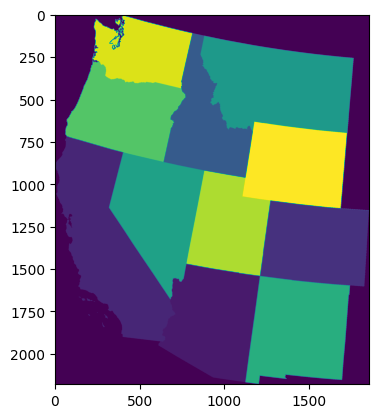

<Axes: >

In [52]:
# open state raster file
conus_array = rasterio.open(state_raster_path).read(1)
show(conus_array)

## Wind Analysis

### Calculate Wind Generation Availability by Scenario 

#### Wind 100m

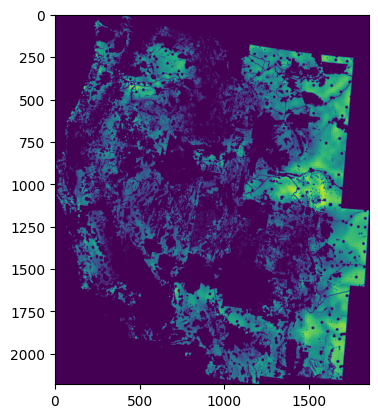

baseline
['/Users/mong275/repos/mongird-etal_2024_tbd/data/input_data/west_raster_data/land_area/wind_100m_hubheight_2050_rcp85_potential_base_exclusions.tif']


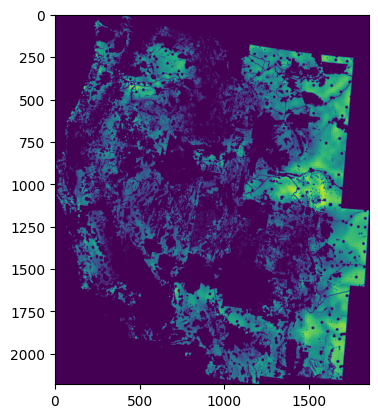

arizona total_generation: 2881679009919 needed_generation: 27293103611 difference: 2854385906308.4336 total land: 95399
california total_generation: 2511118154923 needed_generation: 120102545278 difference: 2391015609645.828 total land: 92159
colorado total_generation: 4981488535345 needed_generation: 69555893333 difference: 4911932642012.459 total land: 146019
idaho total_generation: 1276750522003 needed_generation: 12397083528 difference: 1264353438475.7842 total land: 51335
montana total_generation: 6679438574593 needed_generation: 128392581667 difference: 6551045992926.506 total land: 185984
new_mexico total_generation: 7054149150361 needed_generation: 46859963611 difference: 7007289186750.816 total land: 188741
nevada total_generation: 2181103225058 needed_generation: 9602251750 difference: 2171500973308.3496 total land: 95343
oregon total_generation: 3025492806069 needed_generation: 26269447722 difference: 2999223358347.58 total land: 96741
utah total_generation: 794926700406 nee

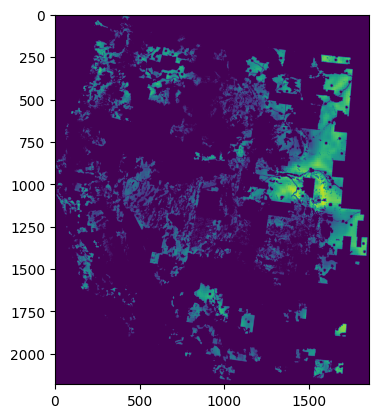

arizona total_generation: 1316413953711 needed_generation: 27293103611 difference: 1289120850100.914 total land: 42716
california total_generation: 1052969129111 needed_generation: 120102545278 difference: 932866583833.206 total land: 37512
colorado total_generation: 2551571097241 needed_generation: 69555893333 difference: 2482015203908.699 total land: 79984
idaho total_generation: 601282899286 needed_generation: 12397083528 difference: 588885815758.377 total land: 22975
montana total_generation: 3718494444826 needed_generation: 128392581667 difference: 3590101863159.9043 total land: 106230
new_mexico total_generation: 757315604983 needed_generation: 46859963611 difference: 710455641372.8867 total land: 20992
nevada total_generation: 1625237453941 needed_generation: 9602251750 difference: 1615635202191.4062 total land: 71543
oregon total_generation: 1005779393753 needed_generation: 26269447722 difference: 979509946031.9062 total land: 30214
utah total_generation: 612653438075 needed_ge

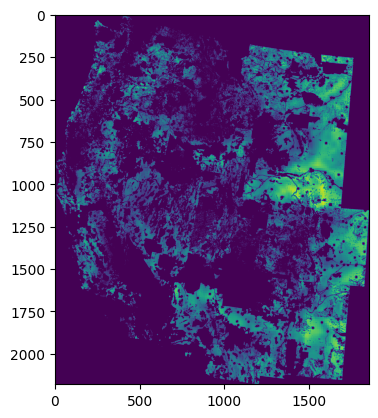

arizona total_generation: 2859765299941 needed_generation: 27293103611 difference: 2832472196330.4062 total land: 94556
california total_generation: 2263954229641 needed_generation: 120102545278 difference: 2143851684363.1133 total land: 82145
colorado total_generation: 4527116452242 needed_generation: 69555893333 difference: 4457560558909.92 total land: 134141
idaho total_generation: 1251075518482 needed_generation: 12397083528 difference: 1238678434954.544 total land: 50306
montana total_generation: 5591828473093 needed_generation: 128392581667 difference: 5463435891426.506 total land: 155883
new_mexico total_generation: 6189565220992 needed_generation: 46859963611 difference: 6142705257381.676 total land: 168489
nevada total_generation: 2180717209345 needed_generation: 9602251750 difference: 2171114957595.459 total land: 95327
oregon total_generation: 1904535608961 needed_generation: 26269447722 difference: 1878266161239.5479 total land: 60101
utah total_generation: 735783441677 nee

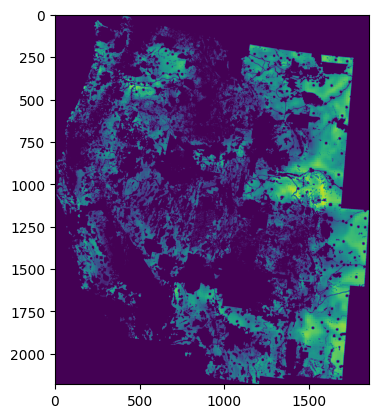

arizona total_generation: 2864785456208 needed_generation: 27293103611 difference: 2837492352597.496 total land: 94752
california total_generation: 2453998598259 needed_generation: 120102545278 difference: 2333896052981.5215 total land: 89846
colorado total_generation: 4969171799150 needed_generation: 69555893333 difference: 4899615905817.391 total land: 145497
idaho total_generation: 1254670839249 needed_generation: 12397083528 difference: 1242273755721.3896 total land: 50603
montana total_generation: 6651371454216 needed_generation: 128392581667 difference: 6522978872549.064 total land: 185136
new_mexico total_generation: 7033718314583 needed_generation: 46859963611 difference: 6986858350972.496 total land: 188018
nevada total_generation: 2096561130040 needed_generation: 9602251750 difference: 2086958878290.2832 total land: 91688
oregon total_generation: 3013095116539 needed_generation: 26269447722 difference: 2986825668817.3066 total land: 96249
utah total_generation: 794163017225 n

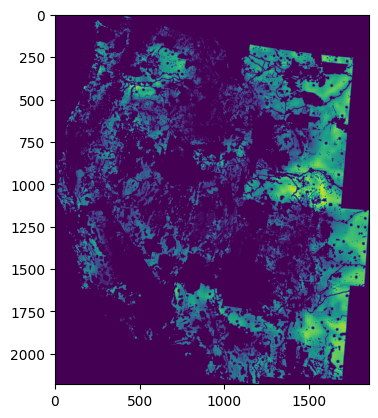

arizona total_generation: 2508084766574 needed_generation: 27293103611 difference: 2480791662963.707 total land: 82391
california total_generation: 1970605800275 needed_generation: 120102545278 difference: 1850503254997.7568 total land: 72689
colorado total_generation: 4553969582964 needed_generation: 69555893333 difference: 4484413689631.844 total land: 130022
idaho total_generation: 1029782382599 needed_generation: 12397083528 difference: 1017385299071.1211 total land: 41427
montana total_generation: 6017704952143 needed_generation: 128392581667 difference: 5889312370476.066 total land: 164876
new_mexico total_generation: 6179469395248 needed_generation: 46859963611 difference: 6132609431637.535 total land: 162174
nevada total_generation: 1580428401832 needed_generation: 9602251750 difference: 1570826150082.7637 total land: 69042
oregon total_generation: 2457500562437 needed_generation: 26269447722 difference: 2431231114715.622 total land: 78365
utah total_generation: 612464505906 ne

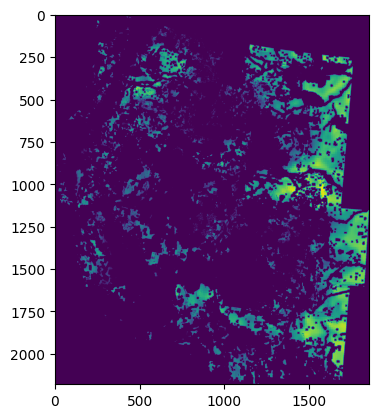

arizona total_generation: 1471572252001 needed_generation: 27293103611 difference: 1444279148390.4648 total land: 46187
california total_generation: 713624571613 needed_generation: 120102545278 difference: 593522026335.4033 total land: 26916
colorado total_generation: 3241474461486 needed_generation: 69555893333 difference: 3171918568153.328 total land: 84848
idaho total_generation: 407317096929 needed_generation: 12397083528 difference: 394920013401.1992 total land: 15861
montana total_generation: 3899385015383 needed_generation: 128392581667 difference: 3770992433716.0566 total land: 100493
new_mexico total_generation: 3936297624745 needed_generation: 46859963611 difference: 3889437661134.6055 total land: 96337
nevada total_generation: 682785831763 needed_generation: 9602251750 difference: 673183580013.1836 total land: 28724
oregon total_generation: 1068884567973 needed_generation: 26269447722 difference: 1042615120251.999 total land: 32939
utah total_generation: 246356511032 needed_

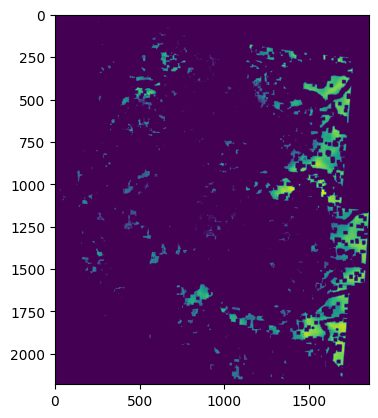

arizona total_generation: 761322617995 needed_generation: 27293103611 difference: 734029514384.6055 total land: 22798
california total_generation: 166619936859 needed_generation: 120102545278 difference: 46517391581.74121 total land: 6130
colorado total_generation: 1962048575003 needed_generation: 69555893333 difference: 1892492681670.1738 total land: 47673
idaho total_generation: 79362147859 needed_generation: 12397083528 difference: 66965064331.86328 total land: 2947
montana total_generation: 1994018134177 needed_generation: 128392581667 difference: 1865625552510.002 total land: 48289
new_mexico total_generation: 2333246687455 needed_generation: 46859963611 difference: 2286386723844.078 total land: 53129
nevada total_generation: 287869512692 needed_generation: 9602251750 difference: 278267260942.8711 total land: 11553
oregon total_generation: 360471943439 needed_generation: 26269447722 difference: 334202495717.9414 total land: 10226
utah total_generation: 60083701094 needed_generatio

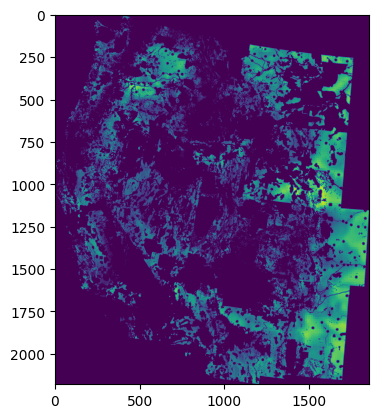

arizona total_generation: 2183481240881 needed_generation: 27293103611 difference: 2156188137270.836 total land: 73039
california total_generation: 2017907330419 needed_generation: 120102545278 difference: 1897804785141.5557 total land: 75516
colorado total_generation: 4790650524692 needed_generation: 69555893333 difference: 4721094631359.871 total land: 138516
idaho total_generation: 980203671326 needed_generation: 12397083528 difference: 967806587798.294 total land: 38837
montana total_generation: 4017046016217 needed_generation: 128392581667 difference: 3888653434550.041 total land: 114024
new_mexico total_generation: 6929477766301 needed_generation: 46859963611 difference: 6882617802690.758 total land: 184327
nevada total_generation: 1910208860908 needed_generation: 9602251750 difference: 1900606609158.4473 total land: 83608
oregon total_generation: 2147656796493 needed_generation: 26269447722 difference: 2121387348771.8965 total land: 69080
utah total_generation: 616377253412 need

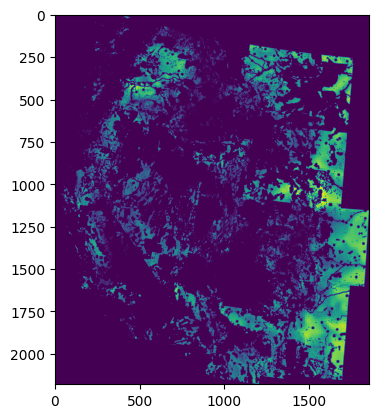

arizona total_generation: 1676102103471 needed_generation: 27293103611 difference: 1648808999860.6797 total land: 56610
california total_generation: 1358683353175 needed_generation: 120102545278 difference: 1238580807897.415 total land: 52217
colorado total_generation: 4335451227347 needed_generation: 69555893333 difference: 4265895334014.9004 total land: 121153
idaho total_generation: 723737244320 needed_generation: 12397083528 difference: 711340160792.0684 total land: 28608
montana total_generation: 3351845116094 needed_generation: 128392581667 difference: 3223452534427.2383 total land: 93200
new_mexico total_generation: 5994726485088 needed_generation: 46859963611 difference: 5947866521477.867 total land: 155755
nevada total_generation: 1397548199350 needed_generation: 9602251750 difference: 1387945947600.3418 total land: 61099
oregon total_generation: 1506886250363 needed_generation: 26269447722 difference: 1480616802641.8916 total land: 48838
utah total_generation: 383265335037 ne

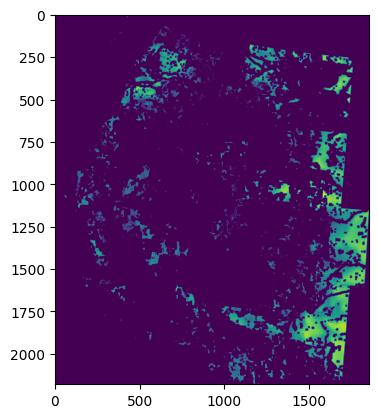

arizona total_generation: 758001846774 needed_generation: 27293103611 difference: 730708743163.9023 total land: 24996
california total_generation: 425627569712 needed_generation: 120102545278 difference: 305525024434.03613 total land: 16576
colorado total_generation: 3044074429885 needed_generation: 69555893333 difference: 2974518536552.254 total land: 77434
idaho total_generation: 181638355510 needed_generation: 12397083528 difference: 169241271982.98633 total land: 7269
montana total_generation: 1546300581985 needed_generation: 128392581667 difference: 1417908000318.8398 total land: 40126
new_mexico total_generation: 3773488711973 needed_generation: 46859963611 difference: 3726628748362.1445 total land: 91043
nevada total_generation: 569026989401 needed_generation: 9602251750 difference: 559424737651.3672 total land: 23863
oregon total_generation: 691443276939 needed_generation: 26269447722 difference: 665173829217.6973 total land: 20997
utah total_generation: 94133669409 needed_gene

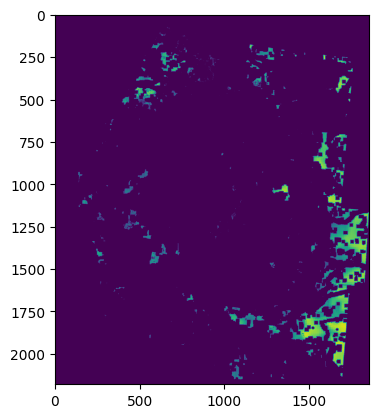

arizona total_generation: 298244849545 needed_generation: 27293103611 difference: 270951745934.89844 total land: 9531
california total_generation: 99301896068 needed_generation: 120102545278 difference: -20800649209.884766 total land: 3645
colorado total_generation: 1831306208334 needed_generation: 69555893333 difference: 1761750315001.961 total land: 43731
idaho total_generation: 26679340166 needed_generation: 12397083528 difference: 14282256638.015625 total land: 1026
montana total_generation: 465073564720 needed_generation: 128392581667 difference: 336680983053.459 total land: 11605
new_mexico total_generation: 2275801292569 needed_generation: 46859963611 difference: 2228941328958.336 total land: 51353
nevada total_generation: 242018967035 needed_generation: 9602251750 difference: 232416715285.15625 total land: 9605
oregon total_generation: 258692267263 needed_generation: 26269447722 difference: 232422819541.1836 total land: 7062
utah total_generation: 8794312105 needed_generation: 

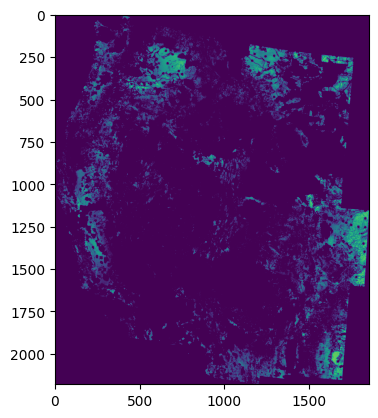

arizona total_generation: 425952745640 needed_generation: 27293103611 difference: 398659642029.625 total land: 16212
california total_generation: 1482776796799 needed_generation: 120102545278 difference: 1362674251521.0723 total land: 57798
colorado total_generation: 2577861173893 needed_generation: 69555893333 difference: 2508305280560.0664 total land: 70377
idaho total_generation: 420159395069 needed_generation: 12397083528 difference: 407762311541.458 total land: 16999
montana total_generation: 2168568796363 needed_generation: 128392581667 difference: 2040176214696.037 total land: 59806
new_mexico total_generation: 1783000137892 needed_generation: 46859963611 difference: 1736140174281.0898 total land: 47515
nevada total_generation: 100440758600 needed_generation: 9602251750 difference: 90838506850.09766 total land: 4890
oregon total_generation: 1076622264389 needed_generation: 26269447722 difference: 1050352816667.2822 total land: 34173
utah total_generation: 178852626366 needed_gen

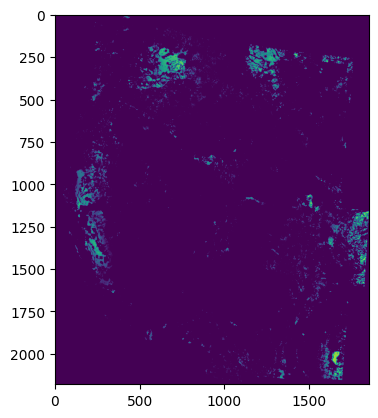

arizona total_generation: 43621143934 needed_generation: 27293103611 difference: 16328040323.570312 total land: 1676
california total_generation: 841074636143 needed_generation: 120102545278 difference: 720972090865.5547 total land: 34009
colorado total_generation: 793126397164 needed_generation: 69555893333 difference: 723570503831.3066 total land: 19829
idaho total_generation: 138772875296 needed_generation: 12397083528 difference: 126375791768.63086 total land: 5552
montana total_generation: 748878701365 needed_generation: 128392581667 difference: 620486119698.7227 total land: 20269
new_mexico total_generation: 462701445789 needed_generation: 46859963611 difference: 415841482178.5508 total land: 11683
nevada total_generation: 7944774004 needed_generation: 9602251750 difference: -1657477745.6054688 total land: 391
oregon total_generation: 167859410696 needed_generation: 26269447722 difference: 141589962974.77734 total land: 5191
utah total_generation: 39139757636 needed_generation: 3

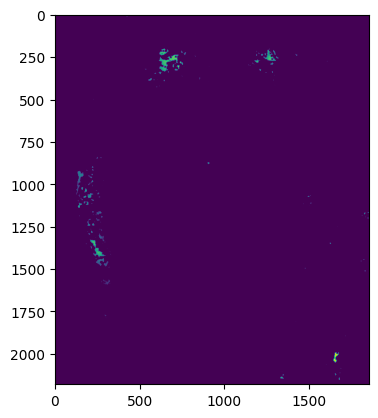

arizona total_generation: 0 needed_generation: 27293103611 difference: -27293103611.0 total land: 0
california total_generation: 211965966183 needed_generation: 120102545278 difference: 91863420905.83789 total land: 8274
colorado total_generation: 4902040779 needed_generation: 69555893333 difference: -64653852553.21484 total land: 113
idaho total_generation: 2825779156 needed_generation: 12397083528 difference: -9571304371.50586 total land: 106
montana total_generation: 81460932017 needed_generation: 128392581667 difference: -46931649649.421875 total land: 2247
new_mexico total_generation: 46894074219 needed_generation: 46859963611 difference: 34110608.7265625 total land: 953
nevada total_generation: 0 needed_generation: 9602251750 difference: -9602251750.0 total land: 0
oregon total_generation: 375173408 needed_generation: 26269447722 difference: -25894274313.796875 total land: 10
utah total_generation: 0 needed_generation: 32291576389 difference: -32291576389.0 total land: 0
washingt

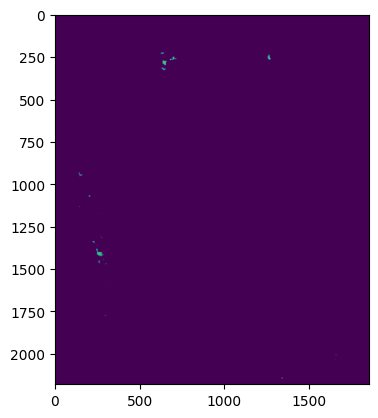

arizona total_generation: 0 needed_generation: 27293103611 difference: -27293103611.0 total land: 0
california total_generation: 38699754548 needed_generation: 120102545278 difference: -81402790729.41602 total land: 1250
colorado total_generation: 0 needed_generation: 69555893333 difference: -69555893333.0 total land: 0
idaho total_generation: 0 needed_generation: 12397083528 difference: -12397083528.0 total land: 0
montana total_generation: 11029035029 needed_generation: 128392581667 difference: -117363546637.70312 total land: 295
new_mexico total_generation: 1213455509 needed_generation: 46859963611 difference: -45646508101.234375 total land: 30
nevada total_generation: 0 needed_generation: 9602251750 difference: -9602251750.0 total land: 0
oregon total_generation: 0 needed_generation: 26269447722 difference: -26269447722.0 total land: 0
utah total_generation: 0 needed_generation: 32291576389 difference: -32291576389.0 total land: 0
washington total_generation: 35850620874 needed_gen

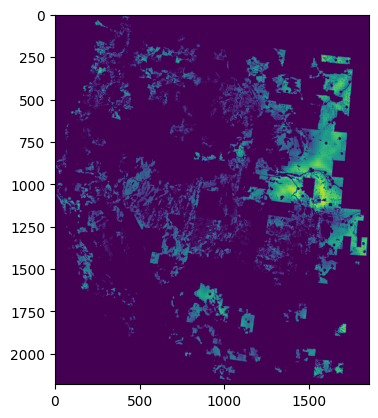

arizona total_generation: 1306480539203 needed_generation: 27293103611 difference: 1279187435592.6133 total land: 42310
california total_generation: 976946994103 needed_generation: 120102545278 difference: 856844448825.2715 total land: 34614
colorado total_generation: 2314731188498 needed_generation: 69555893333 difference: 2245175295165.291 total land: 73167
idaho total_generation: 571385108975 needed_generation: 12397083528 difference: 558988025447.0977 total land: 21964
montana total_generation: 3209799138731 needed_generation: 128392581667 difference: 3081406557064.6895 total land: 91364
new_mexico total_generation: 644910042477 needed_generation: 46859963611 difference: 598050078866.5391 total land: 18320
nevada total_generation: 1570988509271 needed_generation: 9602251750 difference: 1561386257521.4844 total land: 69034
oregon total_generation: 543307271266 needed_generation: 26269447722 difference: 517037823544.1133 total land: 15681
utah total_generation: 563364111878 needed_ge

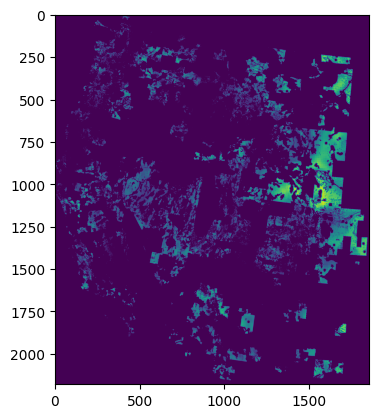

arizona total_generation: 960837583640 needed_generation: 27293103611 difference: 933544480029.625 total land: 31839
california total_generation: 773704059316 needed_generation: 120102545278 difference: 653601514038.4062 total land: 28529
colorado total_generation: 2230907376802 needed_generation: 69555893333 difference: 2161351483469.7344 total land: 69590
idaho total_generation: 448926762074 needed_generation: 12397083528 difference: 436529678546.70703 total land: 16637
montana total_generation: 1908332017698 needed_generation: 128392581667 difference: 1779939436031.4863 total land: 54539
new_mexico total_generation: 638773344152 needed_generation: 46859963611 difference: 591913380541.3438 total land: 18129
nevada total_generation: 1411963998486 needed_generation: 9602251750 difference: 1402361746736.3281 total land: 62128
oregon total_generation: 392071872982 needed_generation: 26269447722 difference: 365802425260.91016 total land: 11715
utah total_generation: 456769349493 needed_ge

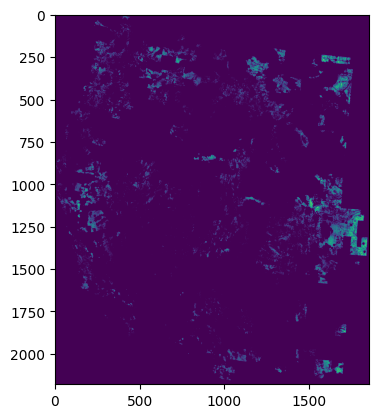

arizona total_generation: 130523288159 needed_generation: 27293103611 difference: 103230184548.17969 total land: 5142
california total_generation: 552469540415 needed_generation: 120102545278 difference: 432366995137.7715 total land: 21209
colorado total_generation: 1291098378321 needed_generation: 69555893333 difference: 1221542484988.5332 total land: 37551
idaho total_generation: 193732661815 needed_generation: 12397083528 difference: 181335578287.4297 total land: 7497
montana total_generation: 957060304568 needed_generation: 128392581667 difference: 828667722901.8477 total land: 25960
new_mexico total_generation: 273053747831 needed_generation: 46859963611 difference: 226193784220.54297 total land: 7078
nevada total_generation: 84542847484 needed_generation: 9602251750 difference: 74940595734.86328 total land: 4131
oregon total_generation: 239241800288 needed_generation: 26269447722 difference: 212972352566.08594 total land: 7015
utah total_generation: 133430531856 needed_generation

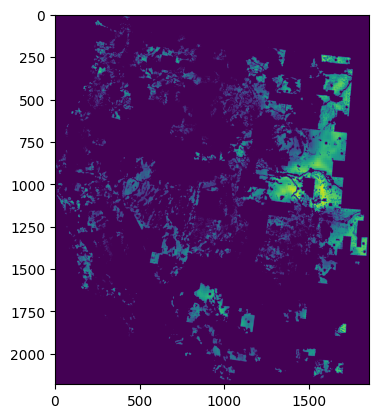

arizona total_generation: 1145036422611 needed_generation: 27293103611 difference: 1117743319000.3281 total land: 37034
california total_generation: 782146322484 needed_generation: 120102545278 difference: 662043777206.7412 total land: 27787
colorado total_generation: 2091389899074 needed_generation: 69555893333 difference: 2021834005741.463 total land: 64322
idaho total_generation: 466272348320 needed_generation: 12397083528 difference: 453875264792.06836 total land: 17993
montana total_generation: 2908798283875 needed_generation: 128392581667 difference: 2780405702208.4883 total land: 81119
new_mexico total_generation: 530434386547 needed_generation: 46859963611 difference: 483574422936.85156 total land: 14849
nevada total_generation: 1170793694687 needed_generation: 9602251750 difference: 1161191442937.2559 total land: 51250
oregon total_generation: 425805056630 needed_generation: 26269447722 difference: 399535608908.8594 total land: 12291
utah total_generation: 439106182958 needed_

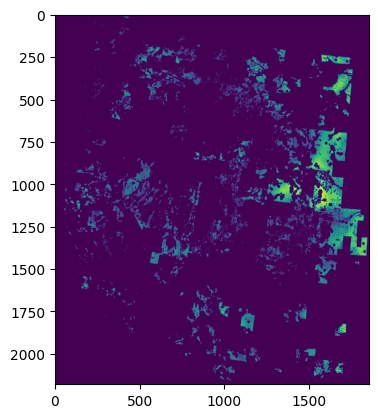

arizona total_generation: 689378709410 needed_generation: 27293103611 difference: 662085605799.1562 total land: 23692
california total_generation: 481255521471 needed_generation: 120102545278 difference: 361152976193.3135 total land: 18773
colorado total_generation: 1963927213385 needed_generation: 69555893333 difference: 1894371320052.0098 total land: 58693
idaho total_generation: 325712977598 needed_generation: 12397083528 difference: 313315894070.87695 total land: 12093
montana total_generation: 1594932436738 needed_generation: 128392581667 difference: 1466539855071.037 total land: 44176
new_mexico total_generation: 517001127246 needed_generation: 46859963611 difference: 470141163635.09375 total land: 14399
nevada total_generation: 1019079984522 needed_generation: 9602251750 difference: 1009477732772.2168 total land: 44716
oregon total_generation: 219102731642 needed_generation: 26269447722 difference: 192833283920.57812 total land: 6749
utah total_generation: 296865833871 needed_ge

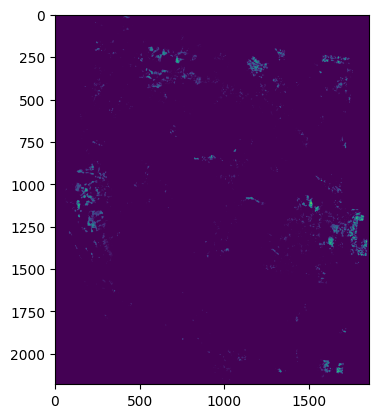

arizona total_generation: 12131279774 needed_generation: 27293103611 difference: -15161823836.585938 total land: 517
california total_generation: 286685909493 needed_generation: 120102545278 difference: 166583364215.53027 total land: 11812
colorado total_generation: 401136465814 needed_generation: 69555893333 difference: 331580572481.4531 total land: 10637
idaho total_generation: 63493239695 needed_generation: 12397083528 difference: 51096156167.80078 total land: 2434
montana total_generation: 228292410856 needed_generation: 128392581667 difference: 99899829189.9336 total land: 5946
new_mexico total_generation: 90830838978 needed_generation: 46859963611 difference: 43970875367.515625 total land: 2330
nevada total_generation: 7479034045 needed_generation: 9602251750 difference: -2123217704.1015625 total land: 368
oregon total_generation: 36051793538 needed_generation: 26269447722 difference: 9782345816.085938 total land: 1130
utah total_generation: 31118447994 needed_generation: 3229157

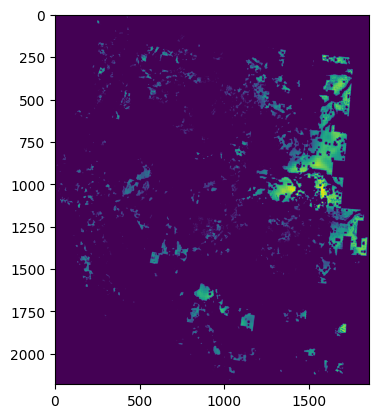

arizona total_generation: 713791034002 needed_generation: 27293103611 difference: 686497930391.4414 total land: 22298
california total_generation: 260671451286 needed_generation: 120102545278 difference: 140568906008.6211 total land: 9166
colorado total_generation: 1418431378426 needed_generation: 69555893333 difference: 1348875485093.7578 total land: 39275
idaho total_generation: 167238228966 needed_generation: 12397083528 difference: 154841145438.06445 total land: 6532
montana total_generation: 1926660763476 needed_generation: 128392581667 difference: 1798268181809.5625 total land: 49631
new_mexico total_generation: 281039728212 needed_generation: 46859963611 difference: 234179764601.89062 total land: 7276
nevada total_generation: 501846187393 needed_generation: 9602251750 difference: 492243935643.0664 total land: 20961
oregon total_generation: 152220502801 needed_generation: 26269447722 difference: 125951055079.75781 total land: 4250
utah total_generation: 180592136414 needed_genera

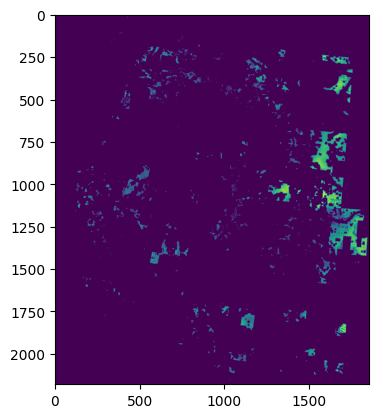

arizona total_generation: 302260252829 needed_generation: 27293103611 difference: 274967149218.58984 total land: 10495
california total_generation: 127128967473 needed_generation: 120102545278 difference: 7026422195.6328125 total land: 4932
colorado total_generation: 1306227168636 needed_generation: 69555893333 difference: 1236671275303.4746 total land: 34508
idaho total_generation: 78350060274 needed_generation: 12397083528 difference: 65952976746.90234 total land: 3082
montana total_generation: 779350141590 needed_generation: 128392581667 difference: 650957559923.8203 total land: 19162
new_mexico total_generation: 269198305551 needed_generation: 46859963611 difference: 222338341940.26953 total land: 6814
nevada total_generation: 406110930692 needed_generation: 9602251750 difference: 396508678942.8711 total land: 16892
oregon total_generation: 90599605983 needed_generation: 26269447722 difference: 64330158261.39844 total land: 2611
utah total_generation: 81241129112 needed_generation:

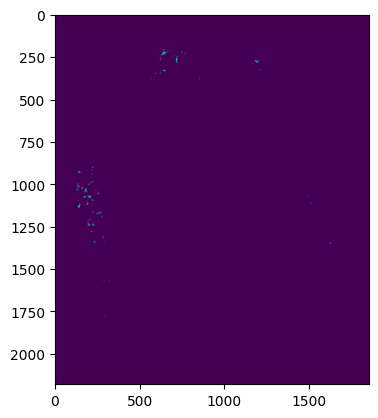

arizona total_generation: 0 needed_generation: 27293103611 difference: -27293103611.0 total land: 0
california total_generation: 57412328159 needed_generation: 120102545278 difference: -62690217118.4541 total land: 2213
colorado total_generation: 1062805365 needed_generation: 69555893333 difference: -68493087967.765625 total land: 25
idaho total_generation: 782011988 needed_generation: 12397083528 difference: -11615071539.47461 total land: 44
montana total_generation: 6241109115 needed_generation: 128392581667 difference: -122151472551.76562 total land: 164
new_mexico total_generation: 239487105 needed_generation: 46859963611 difference: -46620476505.53125 total land: 6
nevada total_generation: 0 needed_generation: 9602251750 difference: -9602251750.0 total land: 0
oregon total_generation: 77520492 needed_generation: 26269447722 difference: -26191927229.8125 total land: 2
utah total_generation: 0 needed_generation: 32291576389 difference: -32291576389.0 total land: 0
washington total_g

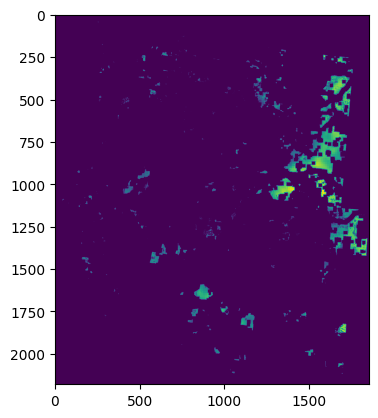

arizona total_generation: 419523356739 needed_generation: 27293103611 difference: 392230253128.2578 total land: 12436
california total_generation: 44242558643 needed_generation: 120102545278 difference: -75859986634.44531 total land: 1555
colorado total_generation: 858893460197 needed_generation: 69555893333 difference: 789337566864.7539 total land: 21538
idaho total_generation: 21579337823 needed_generation: 12397083528 difference: 9182254295.730469 total land: 880
montana total_generation: 1034247053269 needed_generation: 128392581667 difference: 905854471602.043 total land: 24839
new_mexico total_generation: 158364795168 needed_generation: 46859963611 difference: 111504831557.45703 total land: 3550
nevada total_generation: 214722536898 needed_generation: 9602251750 difference: 205120285148.92578 total land: 8384
oregon total_generation: 36228577885 needed_generation: 26269447722 difference: 9959130163.253906 total land: 923
utah total_generation: 46365215652 needed_generation: 32291

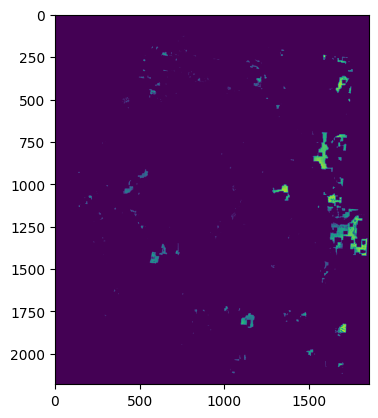

arizona total_generation: 132044125117 needed_generation: 27293103611 difference: 104751021506.67578 total land: 4319
california total_generation: 17100744654 needed_generation: 120102545278 difference: -103001800623.94727 total land: 643
colorado total_generation: 798958665887 needed_generation: 69555893333 difference: 729402772554.6953 total land: 19470
idaho total_generation: 7093369850 needed_generation: 12397083528 difference: -5303713677.902344 total land: 359
montana total_generation: 258184562633 needed_generation: 128392581667 difference: 129791980966.78906 total land: 5815
new_mexico total_generation: 155411686047 needed_generation: 46859963611 difference: 108551722436.36328 total land: 3466
nevada total_generation: 172146705708 needed_generation: 9602251750 difference: 162544453958.98438 total land: 6574
oregon total_generation: 28678397415 needed_generation: 26269447722 difference: 2408949693.5273438 total land: 710
utah total_generation: 7803593080 needed_generation: 32291

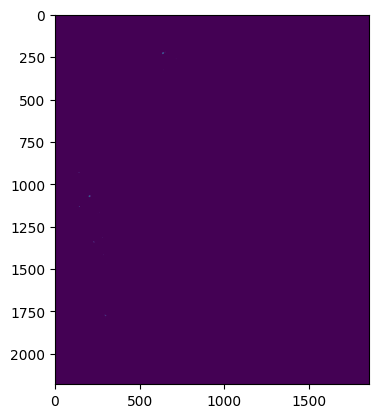

arizona total_generation: 0 needed_generation: 27293103611 difference: -27293103611.0 total land: 0
california total_generation: 2592758175 needed_generation: 120102545278 difference: -117509787102.70703 total land: 88
colorado total_generation: 0 needed_generation: 69555893333 difference: -69555893333.0 total land: 0
idaho total_generation: 0 needed_generation: 12397083528 difference: -12397083528.0 total land: 0
montana total_generation: 0 needed_generation: 128392581667 difference: -128392581667.0 total land: 0
new_mexico total_generation: 0 needed_generation: 46859963611 difference: -46859963611.0 total land: 0
nevada total_generation: 0 needed_generation: 9602251750 difference: -9602251750.0 total land: 0
oregon total_generation: 0 needed_generation: 26269447722 difference: -26269447722.0 total land: 0
utah total_generation: 0 needed_generation: 32291576389 difference: -32291576389.0 total land: 0
washington total_generation: 1555198388 needed_generation: 24513074444 difference: -

In [47]:
# open wind potential raster file
wind_array = rasterio.open(wind_100m_potential_path).read(1)
show(wind_array)

net_zero_dict = gcam_wind_dict
exclusion_combos = exclusion_combos_wind_100m

for power_density_mw in [6, 12, 18]:

    tech_type = f'wind100_{power_density_mw}mw'

    # for each analysis combination
    for analysis_name in exclusion_combos:
    
        # combine the wind potential raster with the additional exclusions
        exclusion_list = exclusion_combos[analysis_name]
        print(analysis_name)
        print(exclusion_list)
        
        for exc in exclusion_list:
                
            exclusion_array = rasterio.open(exc).read(1)
            
            exclusion_array = np.where(exclusion_array==1, 1, 0)
            
            if exclusion_list[0] == exc:
                combined_exclusion = exclusion_array
            else:
                combined_exclusion += exclusion_array
    
            
        combined_exclusion = np.where(combined_exclusion >=1, 0, 1)
            
        final_raster = wind_array*combined_exclusion
        show(final_raster)
    
        # loop through each state
        for state in output_dict:
            state_id = state_settings_dict[state]['id_no']
            state_array = np.where(conus_array==state_id, 1, 0)
            state_array = np.where(state_array==0, 0, 1)
            
            state_raster = state_array*final_raster
    
            total_generation = (state_raster * power_density_mw).sum()
            target_generation = net_zero_dict[state]['2050_KWh']
    
            # calculate the amount of land required to meet generation goals
            state_raster_list = state_raster.flatten()
            state_raster_list = [i for i in state_raster_list if i != 0]
            state_raster_list.sort()
            
            total_km = 0
            total_gen = 0
            for i in state_raster_list[::-1]:
                if total_gen < target_generation:
                    if total_km == len(state_raster_list):
                        total_km = len(state_raster_list)
                    else:
                        total_km += 1
                        total_gen += i
                else:
                    pass
            print(state, f'total_generation: {int(total_generation)}', 
                          f'needed_generation: {int(target_generation)}', 
                          f'difference: {total_generation-target_generation}', 
                          f'total land: {total_km}')
            #show(state_raster)
            output_dict[state][tech_type][analysis_name]['total_gen'] = total_generation
            output_dict[state][tech_type][analysis_name]['total_km'] = total_km

#### Wind 120m

In [ ]:
# open wind potential raster file
wind_array = rasterio.open(wind_120m_potential_path).read(1)
show(wind_array)

net_zero_dict = gcam_wind_dict
exclusion_combos = exclusion_combos_wind_100m

for power_density_mw in [8, 15, 23]:

    tech_type = f'wind120_{power_density_mw}mw'

    # for each analysis combination
    for analysis_name in exclusion_combos:
    
        # combine the wind potential raster with the additional exclusions
        exclusion_list = exclusion_combos[analysis_name]
        print(analysis_name)
        print(exclusion_list)
        
        for exc in exclusion_list:
                
            exclusion_array = rasterio.open(exc).read(1)
            
            exclusion_array = np.where(exclusion_array==1, 1, 0)
            
            if exclusion_list[0] == exc:
                combined_exclusion = exclusion_array
            else:
                combined_exclusion += exclusion_array
    
            
        combined_exclusion = np.where(combined_exclusion >=1, 0, 1)
            
        final_raster = wind_array*combined_exclusion
        show(final_raster)
    
        # loop through each state
        for state in output_dict:
            state_id = state_settings_dict[state]['id_no']
            state_array = np.where(conus_array==state_id, 1, 0)
            state_array = np.where(state_array==0, 0, 1)
            
            state_raster = state_array*final_raster
    
            total_generation = (state_raster * power_density_mw).sum()
            target_generation = net_zero_dict[state]['2050_KWh']
    
            # calculate the amount of land required to meet generation goals
            state_raster_list = state_raster.flatten()
            state_raster_list = [i for i in state_raster_list if i != 0]
            state_raster_list.sort()
            
            total_km = 0
            total_gen = 0
            for i in state_raster_list[::-1]:
                if total_gen < target_generation:
                    if total_km == len(state_raster_list):
                        total_km = len(state_raster_list)
                    else:
                        total_km += 1
                        total_gen += i
                else:
                    pass
            print(state, f'total_generation: {int(total_generation)}', 
                          f'needed_generation: {int(target_generation)}', 
                          f'difference: {total_generation-target_generation}', 
                          f'total land: {total_km}')
            #show(state_raster)
            output_dict[state][tech_type][analysis_name]['total_gen'] = total_generation
            output_dict[state][tech_type][analysis_name]['total_km'] = total_km

## Solar Analysis

### Calculate Solar Generation Availability by Scenario 

baseline


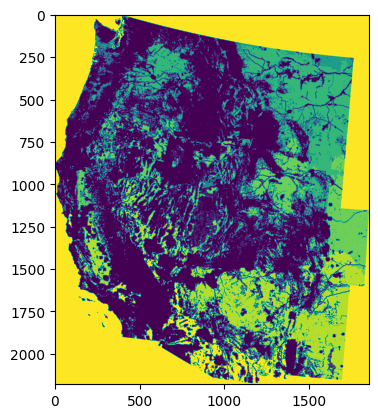

arizona total_generation: 6685080120000 needed_generation: 48044337528.0 difference: 6637035782472.0 total land: 1016
california total_generation: 2787877008000 needed_generation: 114453437500.0 difference: 2673423570500.0 total land: 2420
colorado total_generation: 5175714600000 needed_generation: 48619353833.0 difference: 5127095246167.0 total land: 1157
idaho total_generation: 1083130200000 needed_generation: 1881205019.0 difference: 1081248994981.0 total land: 52
montana total_generation: 6714524232000 needed_generation: 16472904169.0 difference: 6698051327831.0 total land: 523
new_mexico total_generation: 8686769904000 needed_generation: 23806667583.0 difference: 8662963236417.0 total land: 504
nevada total_generation: 2942692488000 needed_generation: 41877650003.0 difference: 2900814837997.0 total land: 886
oregon total_generation: 2212055928000 needed_generation: 8725982333.0 difference: 2203329945667.0 total land: 238
utah total_generation: 1401507144000 needed_generation: 1150

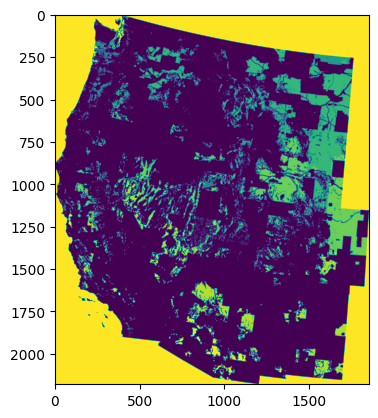

arizona total_generation: 1887624072000 needed_generation: 48044337528.0 difference: 1839579734472.0 total land: 1016
california total_generation: 971356104000 needed_generation: 114453437500.0 difference: 856902666500.0 total land: 2590
colorado total_generation: 2494791936000 needed_generation: 48619353833.0 difference: 2446172582167.0 total land: 1157
idaho total_generation: 400953960000 needed_generation: 1881205019.0 difference: 399072754981.0 total land: 52
montana total_generation: 3323636856000 needed_generation: 16472904169.0 difference: 3307163951831.0 total land: 523
new_mexico total_generation: 911889720000 needed_generation: 23806667583.0 difference: 888083052417.0 total land: 504
nevada total_generation: 2149204680000 needed_generation: 41877650003.0 difference: 2107327029997.0 total land: 886
oregon total_generation: 596035656000 needed_generation: 8725982333.0 difference: 587309673667.0 total land: 238
utah total_generation: 832550400000 needed_generation: 115008938278.

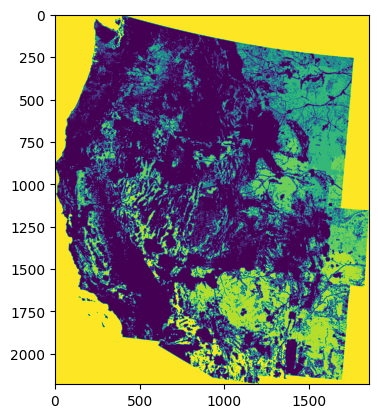

arizona total_generation: 6571855368000 needed_generation: 48044337528.0 difference: 6523811030472.0 total land: 1016
california total_generation: 2281324752000 needed_generation: 114453437500.0 difference: 2166871314500.0 total land: 2420
colorado total_generation: 4682728080000 needed_generation: 48619353833.0 difference: 4634108726167.0 total land: 1157
idaho total_generation: 1047447216000 needed_generation: 1881205019.0 difference: 1045566010981.0 total land: 52
montana total_generation: 5640024384000 needed_generation: 16472904169.0 difference: 5623551479831.0 total land: 523
new_mexico total_generation: 7722320184000 needed_generation: 23806667583.0 difference: 7698513516417.0 total land: 504
nevada total_generation: 2941772688000 needed_generation: 41877650003.0 difference: 2899895037997.0 total land: 886
oregon total_generation: 1248709968000 needed_generation: 8725982333.0 difference: 1239983985667.0 total land: 238
utah total_generation: 1249897824000 needed_generation: 1150

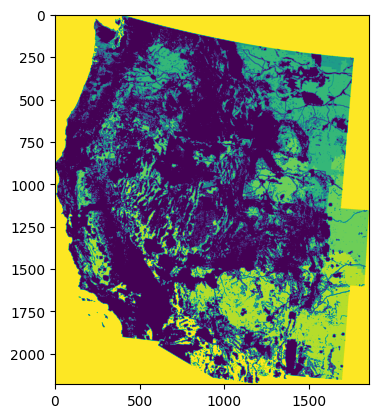

arizona total_generation: 6634764432000 needed_generation: 48044337528.0 difference: 6586720094472.0 total land: 1016
california total_generation: 2691445176000 needed_generation: 114453437500.0 difference: 2576991738500.0 total land: 2420
colorado total_generation: 4940555904000 needed_generation: 48619353833.0 difference: 4891936550167.0 total land: 1157
idaho total_generation: 977016816000 needed_generation: 1881205019.0 difference: 975135610981.0 total land: 52
montana total_generation: 5763424752000 needed_generation: 16472904169.0 difference: 5746951847831.0 total land: 523
new_mexico total_generation: 8672547168000 needed_generation: 23806667583.0 difference: 8648740500417.0 total land: 504
nevada total_generation: 2816863848000 needed_generation: 41877650003.0 difference: 2774986197997.0 total land: 886
oregon total_generation: 2050134336000 needed_generation: 8725982333.0 difference: 2041408353667.0 total land: 238
utah total_generation: 1181307024000 needed_generation: 115008

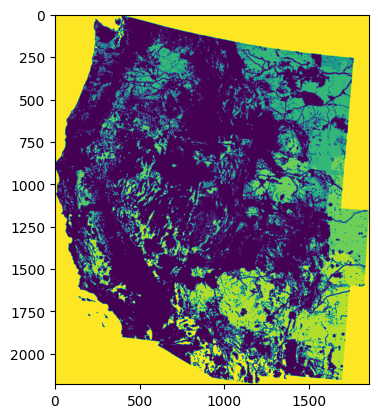

arizona total_generation: 5993469360000 needed_generation: 48044337528.0 difference: 5945425022472.0 total land: 1016
california total_generation: 2175568776000 needed_generation: 114453437500.0 difference: 2061115338500.0 total land: 2420
colorado total_generation: 4502867760000 needed_generation: 48619353833.0 difference: 4454248406167.0 total land: 1157
idaho total_generation: 781835256000 needed_generation: 1881205019.0 difference: 779954050981.0 total land: 52
montana total_generation: 5196838464000 needed_generation: 16472904169.0 difference: 5180365559831.0 total land: 523
new_mexico total_generation: 7540672824000 needed_generation: 23806667583.0 difference: 7516866156417.0 total land: 504
nevada total_generation: 2189654856000 needed_generation: 41877650003.0 difference: 2147777205997.0 total land: 886
oregon total_generation: 1653816168000 needed_generation: 8725982333.0 difference: 1645090185667.0 total land: 238
utah total_generation: 901593216000 needed_generation: 1150089

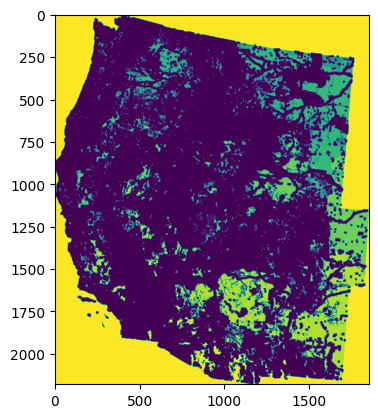

arizona total_generation: 3909323448000 needed_generation: 48044337528.0 difference: 3861279110472.0 total land: 1016
california total_generation: 871197768000 needed_generation: 114453437500.0 difference: 756744330500.0 total land: 2420
colorado total_generation: 3099116304000 needed_generation: 48619353833.0 difference: 3050496950167.0 total land: 1157
idaho total_generation: 295450272000 needed_generation: 1881205019.0 difference: 293569066981.0 total land: 52
montana total_generation: 3219762528000 needed_generation: 16472904169.0 difference: 3203289623831.0 total land: 523
new_mexico total_generation: 4549420152000 needed_generation: 23806667583.0 difference: 4525613484417.0 total land: 504
nevada total_generation: 878172480000 needed_generation: 41877650003.0 difference: 836294829997.0 total land: 886
oregon total_generation: 668973168000 needed_generation: 8725982333.0 difference: 660247185667.0 total land: 238
utah total_generation: 410740632000 needed_generation: 115008938278.

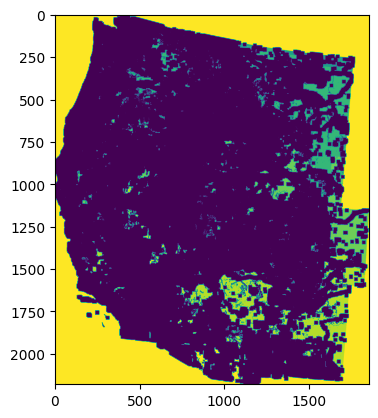

arizona total_generation: 2248374888000 needed_generation: 48044337528.0 difference: 2200330550472.0 total land: 1016
california total_generation: 214255584000 needed_generation: 114453437500.0 difference: 99802146500.0 total land: 2649
colorado total_generation: 1787565600000 needed_generation: 48619353833.0 difference: 1738946246167.0 total land: 1157
idaho total_generation: 63855144000 needed_generation: 1881205019.0 difference: 61973938981.0 total land: 52
montana total_generation: 1547802648000 needed_generation: 16472904169.0 difference: 1531329743831.0 total land: 523
new_mexico total_generation: 2513308824000 needed_generation: 23806667583.0 difference: 2489502156417.0 total land: 517
nevada total_generation: 336778200000 needed_generation: 41877650003.0 difference: 294900549997.0 total land: 943
oregon total_generation: 192290760000 needed_generation: 8725982333.0 difference: 183564777667.0 total land: 238
utah total_generation: 139851648000 needed_generation: 115008938278.0 d

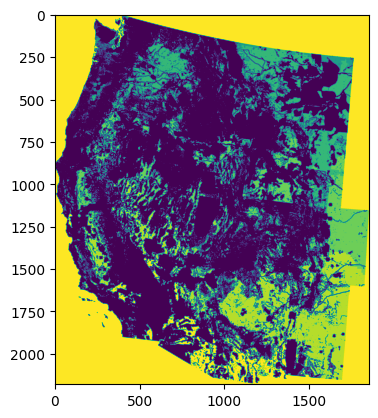

arizona total_generation: 5156761464000 needed_generation: 48044337528.0 difference: 5108717126472.0 total land: 1016
california total_generation: 2373352056000 needed_generation: 114453437500.0 difference: 2258898618500.0 total land: 2420
colorado total_generation: 4784442192000 needed_generation: 48619353833.0 difference: 4735822838167.0 total land: 1157
idaho total_generation: 976028688000 needed_generation: 1881205019.0 difference: 974147482981.0 total land: 52
montana total_generation: 3705569352000 needed_generation: 16472904169.0 difference: 3689096447831.0 total land: 523
new_mexico total_generation: 8564841216000 needed_generation: 23806667583.0 difference: 8541034548417.0 total land: 504
nevada total_generation: 2602907856000 needed_generation: 41877650003.0 difference: 2561030205997.0 total land: 886
oregon total_generation: 1475369712000 needed_generation: 8725982333.0 difference: 1466643729667.0 total land: 238
utah total_generation: 850610016000 needed_generation: 1150089

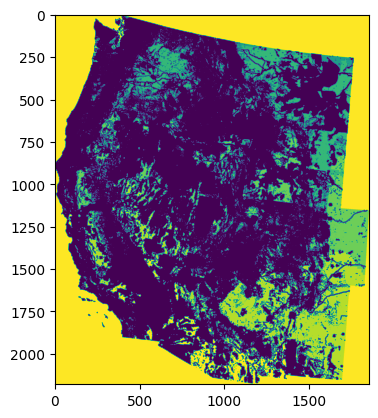

arizona total_generation: 3995427240000 needed_generation: 48044337528.0 difference: 3947382902472.0 total land: 1016
california total_generation: 1697609160000 needed_generation: 114453437500.0 difference: 1583155722500.0 total land: 2420
colorado total_generation: 4314923712000 needed_generation: 48619353833.0 difference: 4266304358167.0 total land: 1157
idaho total_generation: 720340056000 needed_generation: 1881205019.0 difference: 718458850981.0 total land: 52
montana total_generation: 3041741808000 needed_generation: 16472904169.0 difference: 3025268903831.0 total land: 523
new_mexico total_generation: 7320456936000 needed_generation: 23806667583.0 difference: 7296650268417.0 total land: 504
nevada total_generation: 1962122616000 needed_generation: 41877650003.0 difference: 1920244965997.0 total land: 886
oregon total_generation: 1043389584000 needed_generation: 8725982333.0 difference: 1034663601667.0 total land: 238
utah total_generation: 499708944000 needed_generation: 1150089

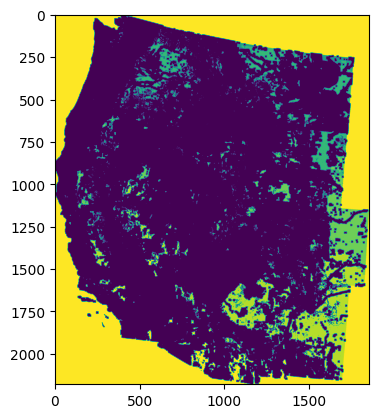

arizona total_generation: 2079930600000 needed_generation: 48044337528.0 difference: 2031886262472.0 total land: 1016
california total_generation: 595835928000 needed_generation: 114453437500.0 difference: 481382490500.0 total land: 2420
colorado total_generation: 2911950144000 needed_generation: 48619353833.0 difference: 2863330790167.0 total land: 1157
idaho total_generation: 169710984000 needed_generation: 1881205019.0 difference: 167829778981.0 total land: 52
montana total_generation: 1331665416000 needed_generation: 16472904169.0 difference: 1315192511831.0 total land: 523
new_mexico total_generation: 4256618904000 needed_generation: 23806667583.0 difference: 4232812236417.0 total land: 504
nevada total_generation: 739456128000 needed_generation: 41877650003.0 difference: 697578477997.0 total land: 886
oregon total_generation: 391193568000 needed_generation: 8725982333.0 difference: 382467585667.0 total land: 238
utah total_generation: 132882192000 needed_generation: 115008938278.

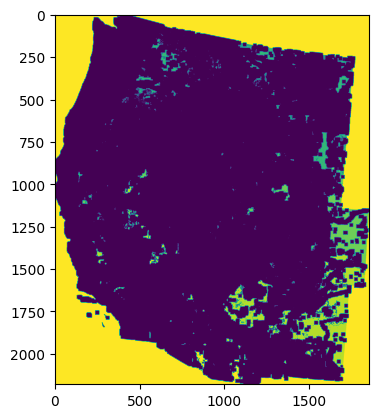

arizona total_generation: 971540064000 needed_generation: 48044337528.0 difference: 923495726472.0 total land: 1016
california total_generation: 140051376000 needed_generation: 114453437500.0 difference: 25597938500.0 total land: 2712
colorado total_generation: 1669210992000 needed_generation: 48619353833.0 difference: 1620591638167.0 total land: 1157
idaho total_generation: 20545704000 needed_generation: 1881205019.0 difference: 18664498981.0 total land: 52
montana total_generation: 379788048000 needed_generation: 16472904169.0 difference: 363315143831.0 total land: 523
new_mexico total_generation: 2309812272000 needed_generation: 23806667583.0 difference: 2286005604417.0 total land: 517
nevada total_generation: 286078824000 needed_generation: 41877650003.0 difference: 244201173997.0 total land: 943
oregon total_generation: 105692904000 needed_generation: 8725982333.0 difference: 96966921667.0 total land: 256
utah total_generation: 36140256000 needed_generation: 115008938278.0 differe

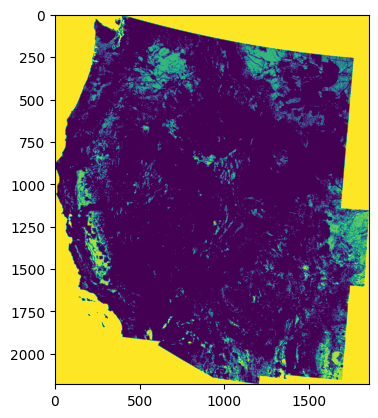

arizona total_generation: 897540840000 needed_generation: 48044337528.0 difference: 849496502472.0 total land: 1016
california total_generation: 1852645392000 needed_generation: 114453437500.0 difference: 1738191954500.0 total land: 2420
colorado total_generation: 2386954584000 needed_generation: 48619353833.0 difference: 2338335230167.0 total land: 1157
idaho total_generation: 424348416000 needed_generation: 1881205019.0 difference: 422467210981.0 total land: 52
montana total_generation: 1966989672000 needed_generation: 16472904169.0 difference: 1950516767831.0 total land: 523
new_mexico total_generation: 2011366080000 needed_generation: 23806667583.0 difference: 1987559412417.0 total land: 504
nevada total_generation: 165669120000 needed_generation: 41877650003.0 difference: 123791469997.0 total land: 992
oregon total_generation: 744349464000 needed_generation: 8725982333.0 difference: 735623481667.0 total land: 238
utah total_generation: 247583880000 needed_generation: 115008938278.

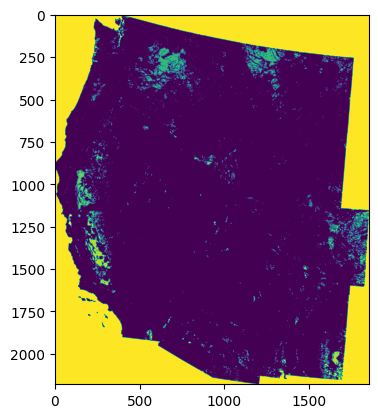

arizona total_generation: 106502328000 needed_generation: 48044337528.0 difference: 58457990472.0 total land: 1016
california total_generation: 1152987696000 needed_generation: 114453437500.0 difference: 1038534258500.0 total land: 2596
colorado total_generation: 701880984000 needed_generation: 48619353833.0 difference: 653261630167.0 total land: 1157
idaho total_generation: 139757040000 needed_generation: 1881205019.0 difference: 137875834981.0 total land: 52
montana total_generation: 675254088000 needed_generation: 16472904169.0 difference: 658781183831.0 total land: 523
new_mexico total_generation: 502494624000 needed_generation: 23806667583.0 difference: 478687956417.0 total land: 504
nevada total_generation: 15310728000 needed_generation: 41877650003.0 difference: -26566922003.0 total land: 398
oregon total_generation: 150684264000 needed_generation: 8725982333.0 difference: 141958281667.0 total land: 238
utah total_generation: 41401512000 needed_generation: 115008938278.0 differe

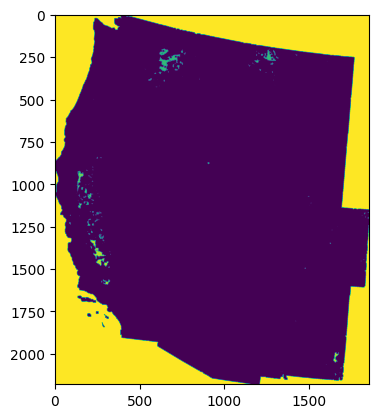

arizona total_generation: 0 needed_generation: 48044337528.0 difference: -48044337528.0 total land: 0
california total_generation: 314939520000 needed_generation: 114453437500.0 difference: 200486082500.0 total land: 2722
colorado total_generation: 4604256000 needed_generation: 48619353833.0 difference: -44015097833.0 total land: 123
idaho total_generation: 2496600000 needed_generation: 1881205019.0 difference: 615394981.0 total land: 52
montana total_generation: 73815264000 needed_generation: 16472904169.0 difference: 57342359831.0 total land: 523
new_mexico total_generation: 46142424000 needed_generation: 23806667583.0 difference: 22335756417.0 total land: 539
nevada total_generation: 0 needed_generation: 41877650003.0 difference: -41877650003.0 total land: 0
oregon total_generation: 409968000 needed_generation: 8725982333.0 difference: -8316014333.0 total land: 13
utah total_generation: 0 needed_generation: 115008938278.0 difference: -115008938278.0 total land: 0
washington total_ge

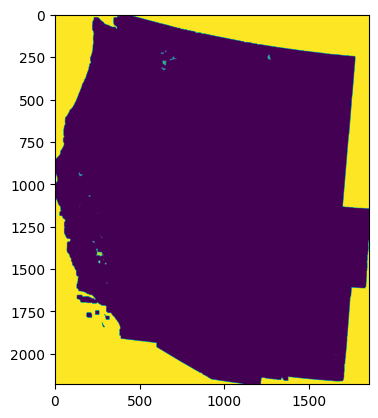

arizona total_generation: 0 needed_generation: 48044337528.0 difference: -48044337528.0 total land: 0
california total_generation: 53385192000 needed_generation: 114453437500.0 difference: -61068245500.0 total land: 1300
colorado total_generation: 0 needed_generation: 48619353833.0 difference: -48619353833.0 total land: 0
idaho total_generation: 0 needed_generation: 1881205019.0 difference: -1881205019.0 total land: 0
montana total_generation: 9303120000 needed_generation: 16472904169.0 difference: -7169784169.0 total land: 295
new_mexico total_generation: 1377072000 needed_generation: 23806667583.0 difference: -22429595583.0 total land: 30
nevada total_generation: 0 needed_generation: 41877650003.0 difference: -41877650003.0 total land: 0
oregon total_generation: 0 needed_generation: 8725982333.0 difference: -8725982333.0 total land: 0
utah total_generation: 0 needed_generation: 115008938278.0 difference: -115008938278.0 total land: 0
washington total_generation: 30053808000 needed_ge

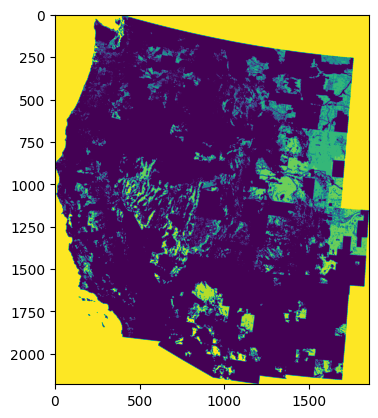

arizona total_generation: 1864555488000 needed_generation: 48044337528.0 difference: 1816511150472.0 total land: 1016
california total_generation: 847813824000 needed_generation: 114453437500.0 difference: 733360386500.0 total land: 2618
colorado total_generation: 2164646808000 needed_generation: 48619353833.0 difference: 2116027454167.0 total land: 1157
idaho total_generation: 368529696000 needed_generation: 1881205019.0 difference: 366648490981.0 total land: 52
montana total_generation: 2310148656000 needed_generation: 16472904169.0 difference: 2293675751831.0 total land: 523
new_mexico total_generation: 775018224000 needed_generation: 23806667583.0 difference: 751211556417.0 total land: 504
nevada total_generation: 2046150288000 needed_generation: 41877650003.0 difference: 2004272637997.0 total land: 886
oregon total_generation: 281111904000 needed_generation: 8725982333.0 difference: 272385921667.0 total land: 238
utah total_generation: 583205760000 needed_generation: 115008938278.

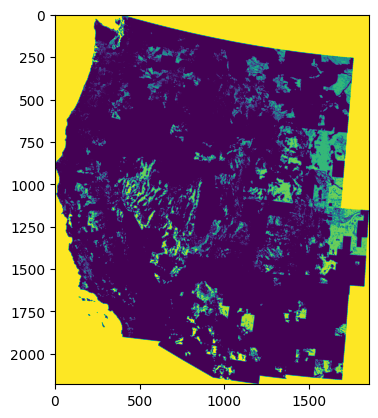

arizona total_generation: 1425280032000 needed_generation: 48044337528.0 difference: 1377235694472.0 total land: 1016
california total_generation: 726873264000 needed_generation: 114453437500.0 difference: 612419826500.0 total land: 2618
colorado total_generation: 2105285544000 needed_generation: 48619353833.0 difference: 2056666190167.0 total land: 1157
idaho total_generation: 368366760000 needed_generation: 1881205019.0 difference: 366485554981.0 total land: 52
montana total_generation: 1410458112000 needed_generation: 16472904169.0 difference: 1393985207831.0 total land: 523
new_mexico total_generation: 769867344000 needed_generation: 23806667583.0 difference: 746060676417.0 total land: 504
nevada total_generation: 1879188192000 needed_generation: 41877650003.0 difference: 1837310541997.0 total land: 886
oregon total_generation: 244456560000 needed_generation: 8725982333.0 difference: 235730577667.0 total land: 238
utah total_generation: 442686600000 needed_generation: 115008938278.

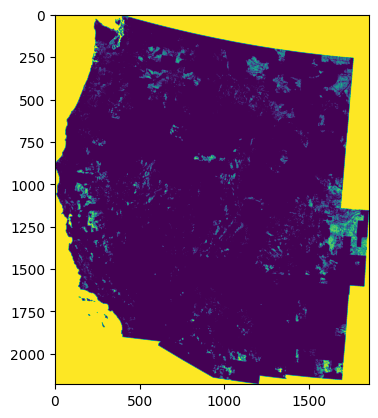

arizona total_generation: 216899352000 needed_generation: 48044337528.0 difference: 168855014472.0 total land: 1016
california total_generation: 571180032000 needed_generation: 114453437500.0 difference: 456726594500.0 total land: 2691
colorado total_generation: 1152209808000 needed_generation: 48619353833.0 difference: 1103590454167.0 total land: 1157
idaho total_generation: 170599248000 needed_generation: 1881205019.0 difference: 168718042981.0 total land: 52
montana total_generation: 690333552000 needed_generation: 16472904169.0 difference: 673860647831.0 total land: 523
new_mexico total_generation: 314534808000 needed_generation: 23806667583.0 difference: 290728140417.0 total land: 504
nevada total_generation: 134900496000 needed_generation: 41877650003.0 difference: 93022845997.0 total land: 1002
oregon total_generation: 143509824000 needed_generation: 8725982333.0 difference: 134783841667.0 total land: 238
utah total_generation: 136466784000 needed_generation: 115008938278.0 diff

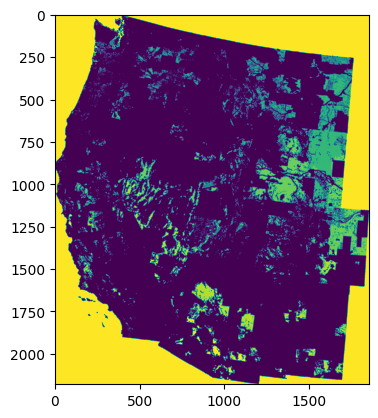

arizona total_generation: 1644434208000 needed_generation: 48044337528.0 difference: 1596389870472.0 total land: 1016
california total_generation: 675742896000 needed_generation: 114453437500.0 difference: 561289458500.0 total land: 2638
colorado total_generation: 1969796376000 needed_generation: 48619353833.0 difference: 1921177022167.0 total land: 1157
idaho total_generation: 281684808000 needed_generation: 1881205019.0 difference: 279803602981.0 total land: 52
montana total_generation: 2078364312000 needed_generation: 16472904169.0 difference: 2061891407831.0 total land: 523
new_mexico total_generation: 636527880000 needed_generation: 23806667583.0 difference: 612721212417.0 total land: 504
nevada total_generation: 1564069968000 needed_generation: 41877650003.0 difference: 1522192317997.0 total land: 886
oregon total_generation: 224925264000 needed_generation: 8725982333.0 difference: 216199281667.0 total land: 238
utah total_generation: 441619632000 needed_generation: 115008938278.

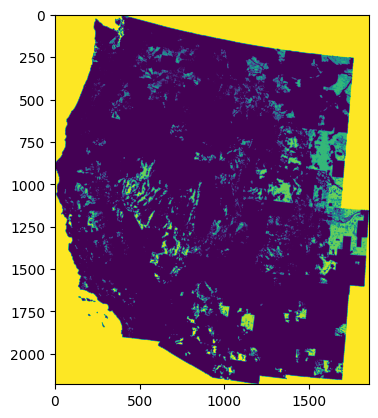

arizona total_generation: 1057349520000 needed_generation: 48044337528.0 difference: 1009305182472.0 total land: 1016
california total_generation: 498379176000 needed_generation: 114453437500.0 difference: 383925738500.0 total land: 2638
colorado total_generation: 1880875368000 needed_generation: 48619353833.0 difference: 1832256014167.0 total land: 1157
idaho total_generation: 256040784000 needed_generation: 1881205019.0 difference: 254159578981.0 total land: 52
montana total_generation: 1146139128000 needed_generation: 16472904169.0 difference: 1129666223831.0 total land: 523
new_mexico total_generation: 621847872000 needed_generation: 23806667583.0 difference: 598041204417.0 total land: 504
nevada total_generation: 1393228944000 needed_generation: 41877650003.0 difference: 1351351293997.0 total land: 886
oregon total_generation: 163587744000 needed_generation: 8725982333.0 difference: 154861761667.0 total land: 238
utah total_generation: 262363752000 needed_generation: 115008938278.

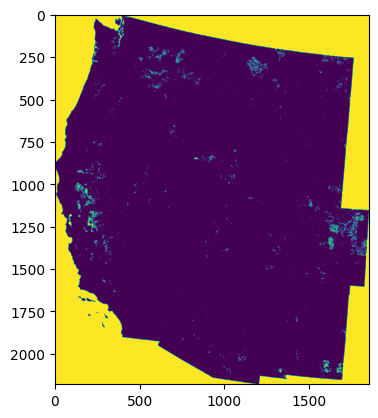

arizona total_generation: 23862240000 needed_generation: 48044337528.0 difference: -24182097528.0 total land: 514
california total_generation: 345671352000 needed_generation: 114453437500.0 difference: 231217914500.0 total land: 2714
colorado total_generation: 350265096000 needed_generation: 48619353833.0 difference: 301645742167.0 total land: 1290
idaho total_generation: 57537432000 needed_generation: 1881205019.0 difference: 55656226981.0 total land: 52
montana total_generation: 167897664000 needed_generation: 16472904169.0 difference: 151424759831.0 total land: 523
new_mexico total_generation: 108588960000 needed_generation: 23806667583.0 difference: 84782292417.0 total land: 534
nevada total_generation: 13607784000 needed_generation: 41877650003.0 difference: -28269866003.0 total land: 353
oregon total_generation: 37123128000 needed_generation: 8725982333.0 difference: 28397145667.0 total land: 246
utah total_generation: 23404968000 needed_generation: 115008938278.0 difference: -91

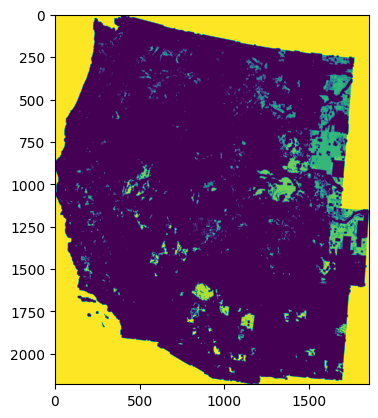

arizona total_generation: 1009824768000 needed_generation: 48044337528.0 difference: 961780430472.0 total land: 1016
california total_generation: 232257384000 needed_generation: 114453437500.0 difference: 117803946500.0 total land: 2676
colorado total_generation: 1341336456000 needed_generation: 48619353833.0 difference: 1292717102167.0 total land: 1157
idaho total_generation: 82555992000 needed_generation: 1881205019.0 difference: 80674786981.0 total land: 52
montana total_generation: 1318930128000 needed_generation: 16472904169.0 difference: 1302457223831.0 total land: 523
new_mexico total_generation: 328683960000 needed_generation: 23806667583.0 difference: 304877292417.0 total land: 541
nevada total_generation: 625269528000 needed_generation: 41877650003.0 difference: 583391877997.0 total land: 918
oregon total_generation: 73174032000 needed_generation: 8725982333.0 difference: 64448049667.0 total land: 238
utah total_generation: 189310608000 needed_generation: 115008938278.0 diffe

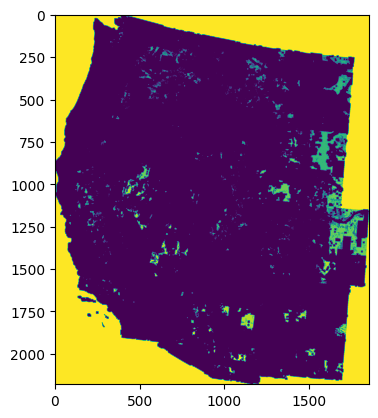

arizona total_generation: 453808296000 needed_generation: 48044337528.0 difference: 405763958472.0 total land: 1016
california total_generation: 143152416000 needed_generation: 114453437500.0 difference: 28698978500.0 total land: 2865
colorado total_generation: 1248457680000 needed_generation: 48619353833.0 difference: 1199838326167.0 total land: 1157
idaho total_generation: 52581024000 needed_generation: 1881205019.0 difference: 50699818981.0 total land: 52
montana total_generation: 517468968000 needed_generation: 16472904169.0 difference: 500996063831.0 total land: 523
new_mexico total_generation: 314519040000 needed_generation: 23806667583.0 difference: 290712372417.0 total land: 549
nevada total_generation: 512822664000 needed_generation: 41877650003.0 difference: 470945013997.0 total land: 918
oregon total_generation: 51682248000 needed_generation: 8725982333.0 difference: 42956265667.0 total land: 238
utah total_generation: 62635752000 needed_generation: 115008938278.0 difference

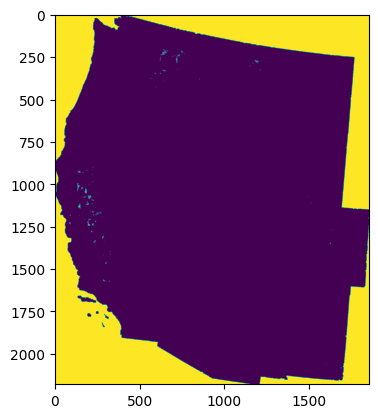

arizona total_generation: 0 needed_generation: 48044337528.0 difference: -48044337528.0 total land: 0
california total_generation: 73158264000 needed_generation: 114453437500.0 difference: -41295173500.0 total land: 1910
colorado total_generation: 1066968000 needed_generation: 48619353833.0 difference: -47552385833.0 total land: 29
idaho total_generation: 215496000 needed_generation: 1881205019.0 difference: -1665709019.0 total land: 7
montana total_generation: 5292792000 needed_generation: 16472904169.0 difference: -11180112169.0 total land: 168
new_mexico total_generation: 867240000 needed_generation: 23806667583.0 difference: -22939427583.0 total land: 20
nevada total_generation: 0 needed_generation: 41877650003.0 difference: -41877650003.0 total land: 0
oregon total_generation: 157680000 needed_generation: 8725982333.0 difference: -8568302333.0 total land: 5
utah total_generation: 0 needed_generation: 115008938278.0 difference: -115008938278.0 total land: 0
washington total_generat

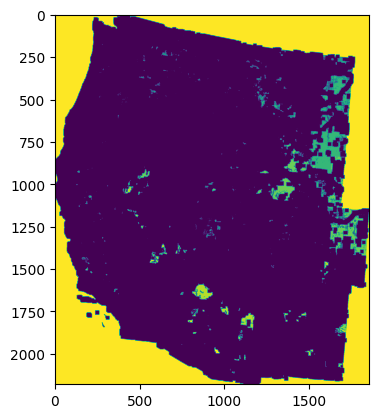

arizona total_generation: 572551848000 needed_generation: 48044337528.0 difference: 524507510472.0 total land: 1016
california total_generation: 41128200000 needed_generation: 114453437500.0 difference: -73325237500.0 total land: 1014
colorado total_generation: 789225192000 needed_generation: 48619353833.0 difference: 740605838167.0 total land: 1222
idaho total_generation: 8982504000 needed_generation: 1881205019.0 difference: 7101298981.0 total land: 59
montana total_generation: 686869848000 needed_generation: 16472904169.0 difference: 670396943831.0 total land: 523
new_mexico total_generation: 162820368000 needed_generation: 23806667583.0 difference: 139013700417.0 total land: 565
nevada total_generation: 243526248000 needed_generation: 41877650003.0 difference: 201648597997.0 total land: 951
oregon total_generation: 15489432000 needed_generation: 8725982333.0 difference: 6763449667.0 total land: 272
utah total_generation: 52612560000 needed_generation: 115008938278.0 difference: -62

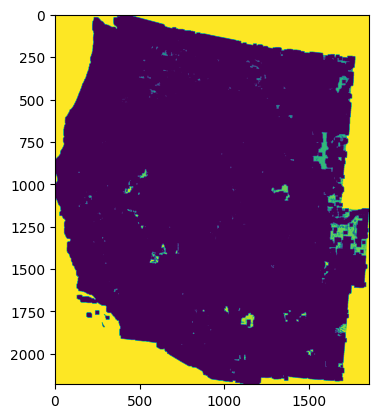

arizona total_generation: 189047808000 needed_generation: 48044337528.0 difference: 141003470472.0 total land: 1086
california total_generation: 19936008000 needed_generation: 114453437500.0 difference: -94517429500.0 total land: 500
colorado total_generation: 732786264000 needed_generation: 48619353833.0 difference: 684166910167.0 total land: 1230
idaho total_generation: 3936744000 needed_generation: 1881205019.0 difference: 2055538981.0 total land: 59
montana total_generation: 162100296000 needed_generation: 16472904169.0 difference: 145627391831.0 total land: 523
new_mexico total_generation: 158110992000 needed_generation: 23806667583.0 difference: 134304324417.0 total land: 565
nevada total_generation: 196758360000 needed_generation: 41877650003.0 difference: 154880709997.0 total land: 951
oregon total_generation: 12472488000 needed_generation: 8725982333.0 difference: 3746505667.0 total land: 277
utah total_generation: 4903848000 needed_generation: 115008938278.0 difference: -1101

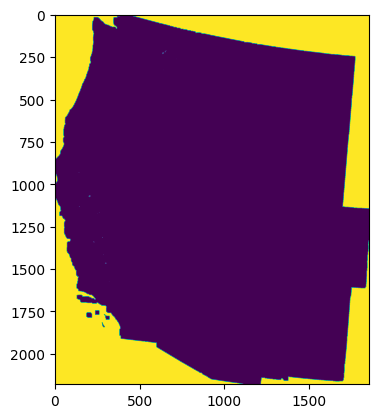

arizona total_generation: 0 needed_generation: 48044337528.0 difference: -48044337528.0 total land: 0
california total_generation: 3589848000 needed_generation: 114453437500.0 difference: -110863589500.0 total land: 93
colorado total_generation: 0 needed_generation: 48619353833.0 difference: -48619353833.0 total land: 0
idaho total_generation: 0 needed_generation: 1881205019.0 difference: -1881205019.0 total land: 0
montana total_generation: 0 needed_generation: 16472904169.0 difference: -16472904169.0 total land: 0
new_mexico total_generation: 0 needed_generation: 23806667583.0 difference: -23806667583.0 total land: 0
nevada total_generation: 0 needed_generation: 41877650003.0 difference: -41877650003.0 total land: 0
oregon total_generation: 0 needed_generation: 8725982333.0 difference: -8725982333.0 total land: 0
utah total_generation: 0 needed_generation: 115008938278.0 difference: -115008938278.0 total land: 0
washington total_generation: 1797552000 needed_generation: 6886721083.0 

In [48]:
# open wind potential raster file
solar_array = rasterio.open(solar_potential_path).read(1)

net_zero_dict = gcam_solar_dict

for power_density_mw in [15, 30, 45]:

    tech_type = f'solar_pv_{power_density_mw}'
    
    # for each analysis combination
    for analysis_name in exclusion_combos:
    
        # combine the wind potential raster with the additional exclusions
        exclusion_list = exclusion_combos[analysis_name]
        print(analysis_name)
        
        if exclusion_list is None:
            
            final_raster = np.where(solar_array==1, 1, 0)
            
        else:
            for exc in exclusion_list:
                exclusion_array = rasterio.open(exc).read(1)
                
                exclusion_array = np.where(exclusion_array==1, 1, 0)
                
                if exclusion_list[0] == exc:
                    combined_exclusion = exclusion_array
                else:
                    combined_exclusion += exclusion_array
                    
            combined_exclusion = np.where(combined_exclusion >=1, 0, 1)
            #show(solar_array)
            final_raster = solar_array*combined_exclusion
    
            show(final_raster)
    
        # loop through each state
        for state in output_dict:
            state_id = state_settings_dict[state]['id_no']
            state_array = np.where(conus_array==state_id, 1, 0)
            state_array = np.where(state_array==0, 0, 1)
            
            state_raster = state_array*final_raster
        
            # calculate total potential generation
            state_raster = ((state_raster/100) * power_density_mw * hours_per_year).astype(int)
    
            total_generation = state_raster.sum()
    
            # calculate the amount of land required to meet generation goals
            state_raster_list = state_raster.flatten()
            state_raster_list = [i for i in state_raster_list if i != 0]
            state_raster_list.sort()
            
            target_generation = net_zero_dict[state]['2050_KWh']
            total_km = 0
            total_gen = 0
            for i in state_raster_list[::-1]:
                if total_gen < target_generation:
                    if total_km == len(state_raster_list):
                        total_km = len(state_raster_list)
                    else:
                        total_km += 1
                        total_gen += i
                else:
                    pass
                    
            
            print(state, f'total_generation: {total_generation}', 
                          f'needed_generation: {target_generation}', 
                          f'difference: {total_generation-target_generation}', 
                          f'total land: {total_km}')
            #show(state_raster)
            output_dict[state][tech_type][analysis_name]['total_gen'] = total_generation
            output_dict[state][tech_type][analysis_name]['total_km'] = total_km

In [51]:
# convert dictionary to dataframe
result_df = pd.DataFrame.from_dict({(i,j,k): output_dict[i][j][k] 
                           for i in output_dict.keys() 
                           for j in output_dict[i].keys()
                           for k in output_dict[i][j].keys()},
                       orient='index')

result_df = result_df.reset_index().rename(columns={'level_0':'region_name', 'level_1':'tech_name_simple', 'level_2':'analysis'})
result_df

#combined with required generation by scenario
#output_df = pd.merge(result_df, combo_df_final, how='left', on=['region_name', 'tech_name_simple'])
result_df

region_name tech_name_simple            analysis             total_gen  \
0       arizona        Wind_100m            baseline  2881679009919.433594   
1       arizona        Wind_100m                 dac  1316413953711.914062   
2       arizona        Wind_100m            farmland   2859765299941.40625   
3       arizona        Wind_100m               env_1  2864785456208.496094   
4       arizona        Wind_100m           env_1_1km  2508084766574.707031   
..          ...              ...                 ...                   ...   
886     wyoming         Solar PV   dac_farm_env2_5km         1287788328000   
887     wyoming         Solar PV   dac_farm_env3_5km             346896000   
888     wyoming         Solar PV  dac_farm_env1_10km         1546178544000   
889     wyoming         Solar PV  dac_farm_env2_10km          543391560000   
890     wyoming         Solar PV  dac_farm_env3_10km                     0   

    total_km  
0      95399  
1      42716  
2      94556  
3      94752  
4      82391  
..       ...  
886      575  
887       11  
888      575  
889      575  
890        0  

[891 rows x 5 columns]

In [16]:
# https://jgcri.github.io/gcam-doc/v6.0/gcam-usa.html
gcam_trading_regions = {
        'arizona': 'SW Grid',
     'california': 'CA Grid',
     'colorado': 'SW Grid',
     'idaho': 'NW Grid',
     'montana': 'NW Grid',
     'new_mexico': 'SW Grid',
     'nevada': 'NW Grid',
     'oregon': 'NW Grid',
     'utah': 'NW Grid',
     'washington': 'NW Grid',
     'wyoming': 'SW Grid'}

In [17]:
wecc_df = output_df.copy()
wecc_df['gcam_trading_region'] = wecc_df.region_name.map(gcam_trading_regions)
wecc_df.to_csv(os.path.join(output_dir, 'capacity_factor_analysis_2050.csv'), index=False)

In [12]:
wecc_df

region_name tech_name_simple            analysis      total_gen  total_km  \
0       arizona             Wind            baseline 1440839504.960      7266   
1       arizona             Wind                 dac  658206976.856      7692   
2       arizona             Wind            farmland 1429882649.971      7266   
3       arizona             Wind               env_1 1432392728.104      7266   
4       arizona             Wind           env_1_1km 1254042383.287      7343   
..          ...              ...                 ...            ...       ...   
589     wyoming         Solar PV   dac_farm_env2_5km  858525552.000      4110   
590     wyoming         Solar PV   dac_farm_env3_5km     231264.000        11   
591     wyoming         Solar PV  dac_farm_env1_10km 1030785696.000      4110   
592     wyoming         Solar PV  dac_farm_env2_10km  362261040.000      4110   
593     wyoming         Solar PV  dac_farm_env3_10km          0.000         0   

     clean_grid_mwh gcam_trading_region  
0          27293103             SW Grid  
1          27293103             SW Grid  
2          27293103             SW Grid  
3          27293103             SW Grid  
4          27293103             SW Grid  
..              ...                 ...  
589        21147912             SW Grid  
590        21147912             SW Grid  
591        21147912             SW Grid  
592        21147912             SW Grid  
593        21147912             SW Grid  

[594 rows x 7 columns]

In [15]:
# Calculate by Western Interconnection total
west_total = wecc_df[['tech_name_simple', 'analysis', 'total_gen', 'total_km', 'clean_grid_mwh']].groupby(['tech_name_simple', 'analysis'], as_index=False).sum()
west_total['gen_difference'] = (round(west_total['total_gen'] - west_total['clean_grid_mwh'])).astype(int)
west_total

tech_name_simple           analysis       total_gen  total_km  \
0          Solar PV           baseline 44598693730.000     16490   
1          Solar PV                dac 18821489937.000     16766   
2          Solar PV      dac_farm_env1 16001585196.000     16794   
3          Solar PV  dac_farm_env1_1km 13863989073.000     16827   
4          Solar PV  dac_farm_env1_5km  8044821476.000     17098   
5          Solar PV      dac_farm_env2 12758467402.000     16794   
6          Solar PV  dac_farm_env2_1km 10094361305.000     16833   
7          Solar PV  dac_farm_env2_5km  4759882775.000     17181   
8          Solar PV      dac_farm_env3  4065944562.000     16960   
9          Solar PV  dac_farm_env3_1km  1311007973.000     15644   
10         Solar PV  dac_farm_env3_5km   105755002.000      2932   
11         Solar PV              env_1 42507625297.000     16490   
12         Solar PV         env_1_10km 11006850485.000     16905   
13         Solar PV          env_1_1km 37075305359.000     16490   
14         Solar PV          env_1_5km 21747901147.000     16584   
15         Solar PV              env_2 35616562911.000     16490   
16         Solar PV         env_2_10km  6759943898.000     16990   
17         Solar PV          env_2_1km 28859039571.000     16490   
18         Solar PV          env_2_5km 14774646957.000     16687   
19         Solar PV              env_3 12173800070.000     16602   
20         Solar PV         env_3_10km    94117922.000      2578   
21         Solar PV          env_3_1km  4206588967.000     15397   
22         Solar PV          env_3_5km   610660450.000      8290   
23         Solar PV           farmland 39482881453.000     16490   
24             Wind           baseline 40269655108.124    176760   
25             Wind                dac 20271766678.004    168200   
26             Wind      dac_farm_env1 18097932981.825    168887   
27             Wind  dac_farm_env1_1km 15830846350.276    165418   
28             Wind  dac_farm_env1_5km  9510493260.861    126811   
29             Wind      dac_farm_env2 13626890882.156    170259   
30             Wind  dac_farm_env2_1km 10754433663.692    160129   
31             Wind  dac_farm_env2_5km  5292924150.272    102368   
32             Wind      dac_farm_env3  4661755655.867    119236   
33             Wind  dac_farm_env3_1km  1392195174.435     42602   
34             Wind  dac_farm_env3_5km    92359506.017      3150   
35             Wind              env_1 39914546733.379    177218   
36             Wind         env_1_10km 10654407073.125    125823   
37             Wind          env_1_1km 34898627365.391    186033   
38             Wind          env_1_5km 20764885086.009    150688   
39             Wind              env_2 31943192103.364    187670   
40             Wind         env_2_10km  6595692037.925     89358   
41             Wind          env_2_1km 25969029716.543    182936   
42             Wind          env_2_5km 13826346343.535    147089   
43             Wind              env_3 12130878858.211    176903   
44             Wind         env_3_10km    86792865.962      2484   
45             Wind          env_3_1km  4100471942.993    110665   
46             Wind          env_3_5km   545296599.524     16725   
47             Wind           farmland 35311710851.459    180128   

    clean_grid_mwh  gen_difference  
0        446925106     44151768624  
1        446925106     18374564831  
2        446925106     15554660090  
3        446925106     13417063967  
4        446925106      7597896370  
5        446925106     12311542296  
6        446925106      9647436199  
7        446925106      4312957669  
8        446925106      3619019456  
9        446925106       864082867  
10       446925106      -341170104  
11       446925106     42060700191  
12       446925106     10559925379  
13       446925106     36628380253  
14       446925106     21300976041  
15       446925106     35169637805  
16       446925106      6313018792  
17  

In [16]:
## Calculate Trading Region Totals
trading_total = wecc_df[['tech_name_simple','trading_region', 'analysis', 'total_gen', 
                         'total_km', 'clean_grid_mwh']].groupby(['tech_name_simple','trading_region', 'analysis'], as_index=False).sum()
trading_total['gen_difference'] = (round(trading_total['total_gen'] - trading_total['clean_grid_mwh'])).astype(int)
trading_total[trading_total.gen_difference <= 0]

tech_name_simple trading_region           analysis     total_gen  \
9           Solar PV           BASN  dac_farm_env3_1km 131960960.000   
10          Solar PV           BASN  dac_farm_env3_5km    562375.000   
20          Solar PV           BASN         env_3_10km         0.000   
22          Solar PV           BASN          env_3_5km   3190364.000   
34          Solar PV           CASO  dac_farm_env3_5km  73158264.000   
44          Solar PV           CASO         env_3_10km  53385192.000   
58          Solar PV           NWPP  dac_farm_env3_5km  30100160.000   
82          Solar PV           RMRG  dac_farm_env3_5km   1066968.000   
92          Solar PV           RMRG         env_3_10km         0.000   
94          Solar PV           RMRG          env_3_5km   4604256.000   
106         Solar PV           SRSG  dac_farm_env3_5km    867235.000   
116         Solar PV           SRSG         env_3_10km   1377050.000   
118         Solar PV           SRSG          env_3_5km  46142205.000   
130             Wind           BASN  dac_farm_env3_5km   1691460.380   
140             Wind           BASN         env_3_10km         0.000   
142             Wind           BASN          env_3_5km   4545904.816   
151             Wind           CASO  dac_farm_env2_5km 127128967.474   
154             Wind           CASO  dac_farm_env3_5km  57412328.160   
160             Wind           CASO         env_2_10km  99301896.068   
164             Wind           CASO         env_3_10km  38699754.549   
178             Wind           NWPP  dac_farm_env3_5km  31953425.007   
188             Wind           NWPP         env_3_10km  46879655.903   
202             Wind           RMRG  dac_farm_env3_5km   1062805.365   
212             Wind           RMRG         env_3_10km         0.000   
214             Wind           RMRG          env_3_5km   4902040.780   
226             Wind           SRSG  dac_farm_env3_5km    239487.105   
236             Wind           SRSG         env_3_10km   1213455.510   
238             Wind           SRSG          env_3_5km  46894074.220   

     total_km  clean_grid_mwh  gen_difference  
9        2319       179915705       -47954745  
10         18       179915705      -179353330  
20          0       179915705      -179915705  
22         91       179915705      -176725341  
34       1910       114453437       -41295173  
44       1300       114453437       -61068245  
58        955        32085607        -1985447  
82         29        48619353       -47552385  
92          0        48619353       -48619353  
94        123        48619353       -44015097  
106        20        71851004       -70983769  
116        30        71851004       -70473954  
118      1070        71851004       -25708799  
130        63       155081560      -153390100  
140         0       155081560      -155081560  
142       140       155081560      -150535655  
151      4932       154566960       -27437993  
154      2213       154566960       -97154632  
160      3645       154566960       -55265064  
164      1250       154566960      -115867205  
178       843       192349136      -160395711  
188      1204       192349136      -145469480  
202        25        69555893       -68493088  
212         0        69555893       -69555893  
214       113        69555893       -64653852  
226         6        74153066       -73913579  
236        30        74153066       -72939610  
238       953        74153066       -27258992